# Predictive Time Series Model:Case Study NSE Kenya 20 Share Index

## 1. Business Understanding

### a) Introduction 

 The Nairobi Securities Exchange (NSE) is the principal securities exchange of Kenya, providing a platform for the buying and selling of various financial instruments, including stocks, bonds, and derivatives. The NSE is a key player in the East African capital markets, attracting local and international investors who seek to capitalize on the investment opportunities presented by the growing Kenyan economy.
 
 The NSE 20 Share Index, launched in 1953, is one of the most widely followed stock market indices in East Africa, comprising the top 20 blue-chip companies listed on the NSE. The index serves as a benchmark for the overall performance of the Kenyan stock market and provides investors with an indication of the market sentiment and direction.
 
 With the advent of technology and the availability of vast amounts of financial data, investors are increasingly turning to quantitative analysis and machine learning techniques to predict stock prices and generate alpha. This project aims to develop a predictive time series model to forecast the stock prices of companies listed in the NSE, using a range of market-specific factors as inputs.
 
The target partners for this project include SACCOs, insurance companies, and pension funds, who are important players in the Kenyan financial market. By developing a reliable time series model to forecast stock prices, the hope is to provide them with valuable insights that can inform their investment decisions and enable them to optimize their portfolio returns.
 
 The project will involve collecting and analyzing historical stock prices and market-specific factors, exploring the various time series models available, and developing and evaluating the performance of the selected model. The results of the project could provide valuable insights into the dynamics of the Kenyan stock market and inform investment decisions by local and international investors.


### b) Problem Statement

Predicting the stock prices in the National Stock Exchange (NSE) is crucial for making informed investment decisions that have a significant impact on the country's economic growth and development. However, the complexity and volatility of the market make it challenging to accurately forecast future stock prices. Investors and traders require precise predictions to buy, sell or hold stocks and improve their investment returns.

Although historical data on stock prices in the NSE is available, traditional forecasting methods may not capture the non-linear patterns and underlying trends that affect stock prices. Moreover, existing studies primarily focus on macroeconomic variables, such as interest rates, inflation rates, and exchange rates. These studies may not consider the market-specific factors that influence stock prices in the NSE.

To address these issues, The Breakfast Club Consultancy aims to use machine learning techniques to identify the market-specific factors that impact stock prices in the NSE. By doing so, we hope to provide accurate stock price forecasts that can help Saccos, pension schemes as well as insurance companies make informed decisions. This research will contribute to a better understanding of the NSE market and potentially enhance the country's economic growth and development.


### c) Main Objective

To develop and deploy a predictive time series model that leverages machine learning techniques to accurately forecast the stock prices of the Kenya NSE 20 Share Index, taking into account market-specific factors and historical data.


### d) Specific Objectives

- Develop and test machine learning models to identify the most significant market-specific factors that influence stock prices in the NSE.
- Evaluate the performance of the machine learning models in predicting future stock prices and compare them with traditional forecasting methods.
- Deploy the developed model online to provide easy access to our target partners, including SACCOs, insurance companies, and pension funds, who can use the model to inform their investment decisions.


### e) Experimental Design
1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Data modelling and model performance evaluation
6. Use the model to make predictions
7. Conclusions and Recommendations
8. Deploy the model

### f) Data Understanding 
The data used in this project was downloaded from [here](https://www.investing.com/indices/kenya-nse-20-historical-data) and [CBK website.](https://www.centralbank.go.ke/inflation-rates/)

The NSE 20 dataset contains 4531 rows and 6 columns with the following information:

|No.| Column    | Description|
|---| ---       | ---         |
|1|Date|Relevant date|
|2|Price|Average price of the stock|
|3|Open|Price at which the stock trades when an exchange opens for the day|
|4|High|Highest price the stock traded on that date|
|5|Low|Lowest price the stock traded on that date|
|6|Change %|Percentage change in stock price from the previous day| 

The data on exchange rate with the USD is downloaded from the [investing website.](https://www.investing.com/currencies/usd-kes-historical-data) It has 4729 rows and 6 columns with the columns having the same information as the NSE 20 dataset columns.

The datasets from the CBK website are on the specific macroeconomic factors affecting the prices of shares. The following datasets have been downloaded:

1. Inflation rates : This has 219 rows and contains the the percentage change in the monthly consumer price index (CPI).
2. Annual GDP : This has 23 rows and contains the Kenyan GDP from 2000-2021
3. Central Bank Rate : Data on this is found in two datasets, with one ranging from 2008-2023 and the other from  1991-2016. They contain the interest rate that the Central Bank of Kenya charges on loans to banks.



## 2. Importing Libraries

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error
from prophet.utilities import regressor_coefficients
from fbprophet.plot import add_changepoints_to_plot
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import pickle

## 3. Reading the Data

In [2]:
# loading data on share index
nse_20 = pd.read_csv("Datasets/Kenya NSE 20 Historical Data.csv")
nse_20.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/28/2023,"1,581.11","1,581.11","1,581.11","1,581.11",NaN,0.78%
1,03/27/2023,"1,568.94","1,568.94","1,568.94","1,568.94",NaN,0.31%
2,03/24/2023,"1,564.16","1,564.16","1,564.16","1,564.16",NaN,0.34%
3,03/23/2023,"1,558.87","1,558.87","1,558.87","1,558.87",NaN,1.14%
4,03/22/2023,"1,541.26","1,541.26","1,541.26","1,541.26",NaN,0.96%


In [3]:
# loading data on annual GDP
annual_gdp = pd.read_csv("Datasets/Annual GDP.csv")
annual_gdp.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [4]:
# loading data on inflation rate
inflation = pd.read_csv("Datasets/Inflation Rates.csv")
inflation.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [5]:
# loading data on CBK interest rate from 2008-2023
cbk_rate_to2023 = pd.read_csv("Datasets/Central Bank Rate (2008-2023) .csv")
cbk_rate_to2023.tail()

,Date,Rate
98,01/12/2008,8.5
99,29/10/2008,9.0
100,01/10/2008,9.0
101,29/09/2008,9.0
102,06/08/2008,9.0


In [6]:
# loading data on CBK interest rate from 1991-2016
cbk_rate_to2016 = pd.read_csv("Datasets/Central Bank Rates (1991-2016).csv")
cbk_rate_to2016.head()

,Year,Month,Repo,Reverse Repo,Interbank Rate,91-Day T-bill,182-Day T-bill,364-Day T-bill,Cash Reserve Requirement,Central Bank Rate
0,2016,July,9.76,10.57,5.88,6.16,9.79,10.88,5.25,10.5
1,2016,June,10.04,10.59,4.56,7.25,9.56,10.84,5.25,10.5
2,2016,May,6,11.55,3.82,8.15,10.25,11.60,5.25,10.5
3,2016,April,5.23,12.49,4.01,8.92,10.87,11.84,5.25,11.5
4,2016,March,4.31,11.63,4.10,8.72,10.83,12.26,5.25,11.5


In [7]:
# loading data on exchange rate
exchange_rate = pd.read_csv("Datasets/USD_KES Historical Data.csv")
exchange_rate.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,132.45,132.350,132.55,132.15,0.02K,0.26%
1,03/30/2023,132.10,132.050,132.55,131.90,0.10K,0.08%
2,03/29/2023,132.00,131.725,132.20,131.60,0.11K,0.23%
3,03/28/2023,131.70,131.600,131.90,131.40,0.10K,0.19%
4,03/27/2023,131.45,131.450,131.60,131.30,0.06K,0.11%


## 4. Data Wrangling
### 4.3 Dropping columns

Out of the several datasets that were collected, only some features and rows are relevant to the process. Therefore, in this step, the features that are not required from each dataset will be dropped. The remaining datasets will then be joined.

In [8]:
# Selecting necessary columns in the annual_gdp dataset
nse_20_new = nse_20[["Date", "Price"]]
nse_20_new.head()

,Date,Price
0,03/28/2023,"1,581.11"
1,03/27/2023,"1,568.94"
2,03/24/2023,"1,564.16"
3,03/23/2023,"1,558.87"
4,03/22/2023,"1,541.26"


In [9]:
nse_20_new.shape

(4530, 2)

This dataset contains 4530 rows and 2 columns.

In [10]:
# Selecting relevant columns in the annual_gdp dataset
annual_gdp_new = annual_gdp[["Year", "Real GDP prices (Ksh Million)"]]
annual_gdp_new.head()

,Year,Real GDP prices (Ksh Million)
0,2021,"9,391,684"
1,2020,"8,735,040"
2,2019,"8,756,946"
3,2018,"8,330,891"
4,2017,"7,885,521"


In [11]:
annual_gdp_new.shape

(23, 2)

This dataset has 23 rows and 2 columns

In [12]:
# Dropping unnecessary columns in the inflation dataset
inflation_new = inflation.drop(['Annual Average Inflation'], axis=1)
inflation_new.head()

,Year,Month,12-Month Inflation
0,2023,February,9.23
1,2023,January,8.98
2,2022,December,9.06
3,2022,November,9.48
4,2022,October,9.59


In [13]:
inflation_new.shape

(219, 3)

This dataset contains 219 rows and 3 columns.

In [14]:
# For the cbk_to_2016 dataset, the only column required is the central bank rate
cbk_rate_to2016_new = cbk_rate_to2016[['Year', 'Month', 'Central Bank Rate']] 
cbk_rate_to2016_new.tail()

,Year,Month,Central Bank Rate
296,1991,November,NaN
297,1991,October,NaN
298,1991,September,0.0
299,1991,August,0.0
300,1991,July,0.0


In [15]:
cbk_rate_to2016_new.shape

(301, 3)

This dataset contains 301 rows and 3 columns.

In [16]:
# In the exchage_rate dataset, we only keep the US dollar column
exchange_rate_new = exchange_rate[["Date","Price"]]
exchange_rate_new.tail()

,Date,Price
4724,01/07/2005,78.500
4725,01/06/2005,78.675
4726,01/05/2005,78.600
4727,01/04/2005,78.650
4728,01/03/2005,78.500


In [17]:
exchange_rate_new.shape

(4729, 2)

This dataset contains 362 rows and 3 columns.

Now that all the necessary information has been retrieved from each dataset, the datasets can be formatted.

### 4.2 Formatting Datatypes

The cbk_rates datasets are in different formats, so before joining them, that needs to be adjusted. Since the data required should only be from 2005, any data before that will be dropped.

#### 4.2.1 CBK rates dataframes

In [18]:
# changing year column to string
cbk_rate_to2016_new.Year = cbk_rate_to2016_new.Year.astype("str")

# creating Date column which is an aggregation of month and year columns
cbk_rate_to2016_new["Date"] = cbk_rate_to2016_new[["Month","Year"]].agg(' '.join, axis=1)

# converting to datetime format
cbk_rate_to2016_new["Date"] = pd.to_datetime(cbk_rate_to2016_new.Date)

In [19]:
# previewing
cbk_rate_to2016_new.head()

,Year,Month,Central Bank Rate,Date
0,2016,July,10.5,2016-07-01
1,2016,June,10.5,2016-06-01
2,2016,May,10.5,2016-05-01
3,2016,April,11.5,2016-04-01
4,2016,March,11.5,2016-03-01


In [20]:
# Dropping data from the cbk_rate_to2016_new that dates before 2005
start_date = '2005-01-01'
end_date = '2008-07-31'
cbk_rate_to2016_final = cbk_rate_to2016_new[
    (cbk_rate_to2016_new['Date'] >= start_date) & (cbk_rate_to2016_new['Date'] <= end_date)]
cbk_rate_to2016_final.head()

,Year,Month,Central Bank Rate,Date
96,2008,July,9.00,2008-07-01
97,2008,June,9.00,2008-06-01
98,2008,May,8.75,2008-05-01
99,2008,April,8.75,2008-04-01
100,2008,March,8.75,2008-03-01


In [21]:
# dropping Year and Month columns
cbk_rate_to2016_final = cbk_rate_to2016_final[['Central Bank Rate', 'Date']]
cbk_rate_to2016_final.head()

,Central Bank Rate,Date
96,9.00,2008-07-01
97,9.00,2008-06-01
98,8.75,2008-05-01
99,8.75,2008-04-01
100,8.75,2008-03-01


In [22]:
# Changing the cbk_rate_to2023 from string to datetime format
cbk_rate_to2023.Date = pd.to_datetime(cbk_rate_to2023.Date,format="%d/%m/%Y")
cbk_rate_to2023.head()

,Date,Rate
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


In [23]:
# Joining the cbk_rate_to2016_final and the cbk_rate_2023 datasets
# Ensuring that the column names match
cbk_rate_to2016_final.rename(columns={'Central Bank Rate':'Rate'}, inplace=True)
cbk_rate_to2016_final.head()

,Rate,Date
96,9.00,2008-07-01
97,9.00,2008-06-01
98,8.75,2008-05-01
99,8.75,2008-04-01
100,8.75,2008-03-01


In [24]:
# concatenating the two dataframes
merged_cbk_rate_df = pd.concat([cbk_rate_to2023, cbk_rate_to2016_final])
merged_cbk_rate_df.head()

,Date,Rate
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


In [25]:
# renaming the rates column
merged_cbk_rate_df = merged_cbk_rate_df.rename(columns = {'Rate':'CBK Rates'})
merged_cbk_rate_df.head()

,Date,CBK Rates
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


#### 4.2.2 Inflation dataframe

In [26]:
# Converting the inflation dataframe to datetime format
# changing year column to string
inflation_new.Year = inflation_new.Year.astype("str")

# creating Date column which is an aggregation of month and year columns
inflation_new["Date"] = inflation_new[["Month","Year"]].agg(' '.join, axis=1)

# converting to datetime format
inflation_new["Date"] = pd.to_datetime(inflation_new.Date)

In [27]:
# previewing
inflation_new.head()

,Year,Month,12-Month Inflation,Date
0,2023,February,9.23,2023-02-01
1,2023,January,8.98,2023-01-01
2,2022,December,9.06,2022-12-01
3,2022,November,9.48,2022-11-01
4,2022,October,9.59,2022-10-01


In [28]:
# dropping Year and Month columns
inflation_final = inflation_new[['12-Month Inflation', 'Date']]
inflation_final.head()

,12-Month Inflation,Date
0,9.23,2023-02-01
1,8.98,2023-01-01
2,9.06,2022-12-01
3,9.48,2022-11-01
4,9.59,2022-10-01


In [29]:
# renaming the inflation column
inflation_final = inflation_final.rename(columns={'12-Month Inflation':'Inflation Rate'})
inflation_final.tail()

,Inflation Rate,Date
214,14.78,2005-05-01
215,16.02,2005-04-01
216,14.15,2005-03-01
217,13.94,2005-02-01
218,14.87,2005-01-01


In [30]:
inflation_final.shape

(219, 2)

#### 4.2.3 NSE 20 dataframe

In [31]:
# formatting the date column
nse_20_new.Date = pd.to_datetime(nse_20_new.Date,format="%m/%d/%Y")
nse_20_new.head()

,Date,Price
0,2023-03-28,"1,581.11"
1,2023-03-27,"1,568.94"
2,2023-03-24,"1,564.16"
3,2023-03-23,"1,558.87"
4,2023-03-22,"1,541.26"


In [32]:
# Converting Price column to float
nse_20_new.Price = nse_20_new.Price.str.replace(",","")
nse_20_new.Price = nse_20_new.Price.astype("float")
nse_20_new.head()

,Date,Price
0,2023-03-28,1581.11
1,2023-03-27,1568.94
2,2023-03-24,1564.16
3,2023-03-23,1558.87
4,2023-03-22,1541.26


In [33]:
# previewing
nse_20_new.tail()

,Date,Price
4525,2005-01-07,3007.94
4526,2005-01-06,2981.10
4527,2005-01-05,2991.32
4528,2005-01-04,2980.48
4529,2005-01-03,2955.99


#### 4.2.4 Exchange Rate

In [34]:
# previewing
exchange_rate_new.head()

,Date,Price
0,03/31/2023,132.45
1,03/30/2023,132.10
2,03/29/2023,132.00
3,03/28/2023,131.70
4,03/27/2023,131.45


In [35]:
# changing the date column to datetime format
exchange_rate_new['Date'] = pd.to_datetime(exchange_rate_new["Date"],format="%m/%d/%Y")
exchange_rate_new.head()

,Date,Price
0,2023-03-31,132.45
1,2023-03-30,132.10
2,2023-03-29,132.00
3,2023-03-28,131.70
4,2023-03-27,131.45


In [36]:
# renaming exchange rate column
exchange_rate_new.rename(columns={"Price":"Exc Rate"},inplace=True)

#### 4.2.5 Annual GDP Dataframe

In [37]:
#  Converting Real GDP column to integer
annual_gdp_new['Real GDP prices (Ksh Million)'] = annual_gdp_new['Real GDP prices (Ksh Million)'].str.replace(",","")
annual_gdp_new['Real GDP prices (Ksh Million)'] = annual_gdp_new['Real GDP prices (Ksh Million)'].astype("int")
annual_gdp_new.head()

,Year,Real GDP prices (Ksh Million)
0,2021,9391684
1,2020,8735040
2,2019,8756946
3,2018,8330891
4,2017,7885521


In [38]:
# dropping the last row which has 0 on all columns
annual_gdp_final = annual_gdp_new.drop(index=22)

In [39]:
# converting to datetime format
annual_gdp_final.Year = pd.to_datetime(annual_gdp_final.Year,format="%Y")
annual_gdp_final.head()

,Year,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [40]:
annual_gdp_final.shape

(22, 2)

In [41]:
# changing Year column to Date for uniformity
annual_gdp_final = annual_gdp_final.rename(columns={'Year':'Date'}) 
annual_gdp_final.head()

,Date,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [42]:
# Slice the dataset from before 2005
annual_gdp_final = annual_gdp_final[annual_gdp_final['Date'].dt.year >= 2005]
annual_gdp_final.head()

,Date,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [43]:
# renaming GDP column
annual_gdp_final = annual_gdp_final.rename(columns = {'Real GDP prices (Ksh Million)':'GDP'})
annual_gdp_final.head()

,Date,GDP
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


### 4.3 Joining all the datasets

In [44]:
# performing outer join on Date
Data_1 = pd.merge(nse_20_new, merged_cbk_rate_df, on='Date', how='outer')

Data_2 = pd.merge(Data_1, exchange_rate_new, on='Date', how='outer')

Data_3 = pd.merge(Data_2, inflation_final, on='Date', how='outer')

Data_4 = pd.merge(Data_3, annual_gdp_final, on='Date', how='outer')

In [45]:
# sorting the dataframe by Date
final_dataset = Data_4.sort_values(by="Date",ascending=False)

In [46]:
# setting date column as index
final_dataset = final_dataset.set_index("Date")

In [47]:
# previewing
final_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,NaN,NaN,132.45,NaN,NaN
2023-03-30,NaN,NaN,132.10,NaN,NaN
2023-03-29,NaN,9.5,132.00,NaN,NaN
2023-03-28,1581.11,NaN,131.70,NaN,NaN
2023-03-27,1568.94,NaN,131.45,NaN,NaN


In [48]:
# checking for missing values
final_dataset.isnull().sum()

Price              266
CBK Rates         4670
Exc Rate            67
Inflation Rate    4580
GDP               4782
dtype: int64

In [49]:
# forward filling certain columns
filled_dataset = final_dataset[["Price","CBK Rates","Exc Rate","Inflation Rate"]].fillna(method="ffill")

In [50]:
# back filling GDP column
filled_dataset1 = final_dataset["GDP"].fillna(method="bfill")

In [51]:
# joining the two datasets
filled_dataset = filled_dataset.merge(filled_dataset1,on="Date",how="outer")

In [52]:
filled_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,NaN,NaN,132.45,NaN,9391684.0
2023-03-30,NaN,NaN,132.10,NaN,9391684.0
2023-03-29,NaN,9.5,132.00,NaN,9391684.0
2023-03-28,1581.11,9.5,131.70,NaN,9391684.0
2023-03-27,1568.94,9.5,131.45,NaN,9391684.0


In [53]:
# backfilling remaining missing values
filled_dataset = filled_dataset.bfill()

In [54]:
filled_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,1581.11,9.5,132.45,9.23,9391684.0
2023-03-30,1581.11,9.5,132.10,9.23,9391684.0
2023-03-29,1581.11,9.5,132.00,9.23,9391684.0
2023-03-28,1581.11,9.5,131.70,9.23,9391684.0
2023-03-27,1568.94,9.5,131.45,9.23,9391684.0


In [55]:
# Create a new DataFrame with a full date range
start_date = filled_dataset.index.min()
end_date = filled_dataset.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
full_df = pd.DataFrame(index=date_range)
full_df.head()

""
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05


In [56]:
# sorting dates in descending order
full_df.sort_index(ascending=False,inplace=True)

In [57]:
# resetting index in order to merge
filled_dataset.reset_index(inplace=True)

In [58]:
# naming the dates dataframe
full_df.index.name = "Date"

In [59]:
# merging the two datasets on date
main_df = full_df.merge(filled_dataset,how="outer",on="Date")

In [60]:
# backfilling missing values
main_df = main_df.bfill()

In [61]:
# checking for missing values
main_df.isna().sum()

Date              0
Price             0
CBK Rates         0
Exc Rate          0
Inflation Rate    0
GDP               0
dtype: int64

In [62]:
# checking for duplicates
main_df.duplicated().sum()

9

In [63]:
# dropping duplicates
main_df.drop_duplicates(inplace=True)

In [64]:
# setting date as index columns
main_df.set_index("Date",inplace=True)

## 5. Exploratory Data Analysis
### 5.1 Univariate Analysis

In [65]:
# setting a style for plots
sns.set_palette("Spectral")
sns.set_style("darkgrid")

# defining a function to plot time series
def plot_time_series(df,col):
    
    # defining figsize
    plt.figure(figsize=(10,6), tight_layout=True)
    plt.plot(df[col], linewidth=2,label=f"{col}")
    plt.xlabel('Year')
    plt.ylabel(f'{col}')
    plt.title(f'{col} through the years')
    plt.legend()
    plt.show()

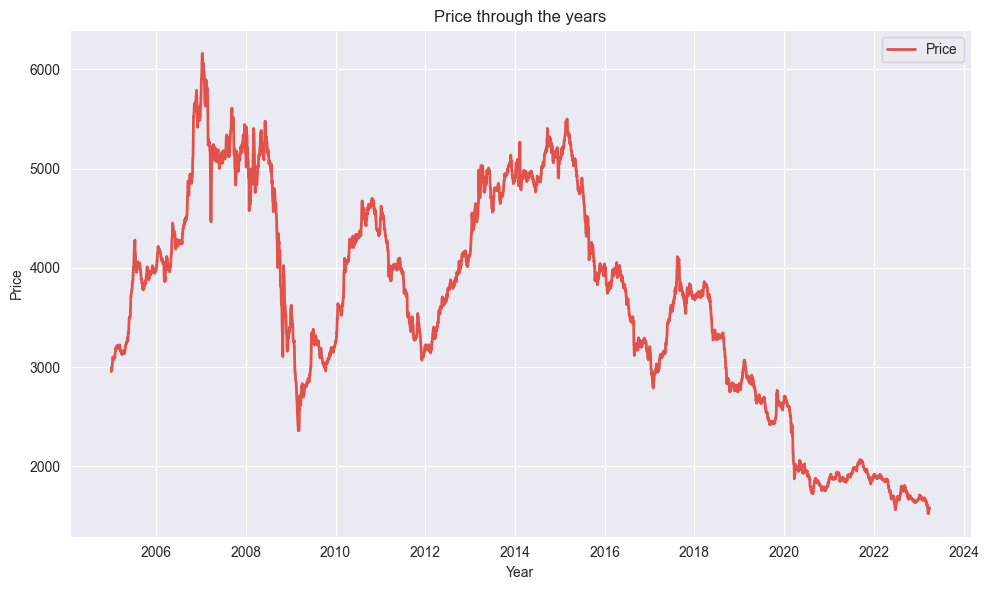

In [66]:
# plotting NSE 20 index price
plot_time_series(main_df,"Price")

From the time series, the prices are highest in 2007 and then experiences a continous decline in 2008 all the way to 2009. This may have been as a result of the political instability caused by the post election violence. The prices are seen to keep following a similar trend over the years, increasing and decreasing in succession.

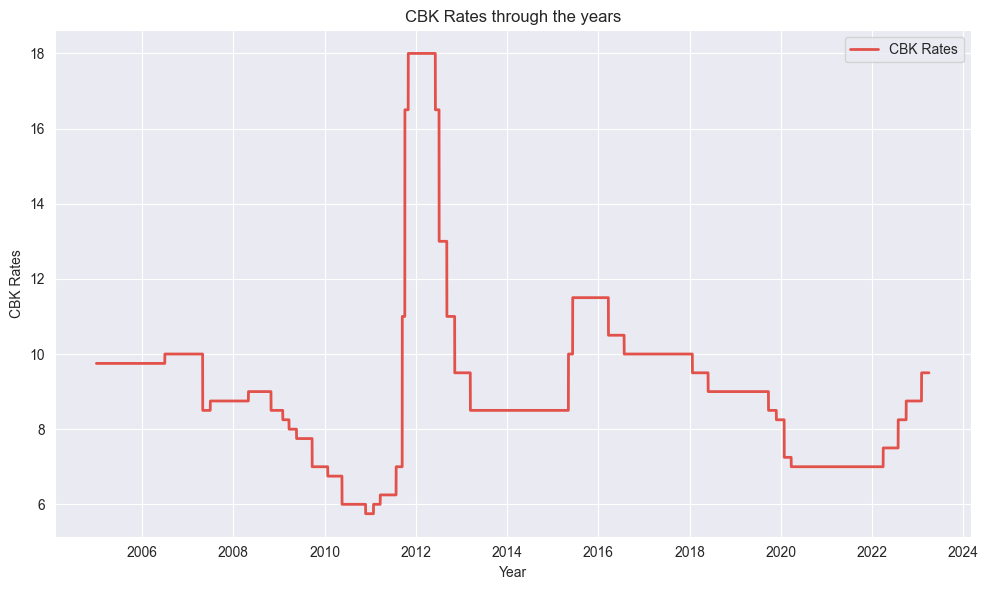

In [67]:
# plotting CBK rates
plot_time_series(main_df,"CBK Rates")

The CBK rates are seen to be almost constant from 2005 to 2007 before dipping and experiencing a continous drop up until 2011 before spiking again.The CBK rates are seen to be highest in 2012.This was possibly as a result of high inflation rate and fiscal deficit. In 2016, CBK introduced a cap on their interest rates and this can be seen on the graph because there is a downward trend.

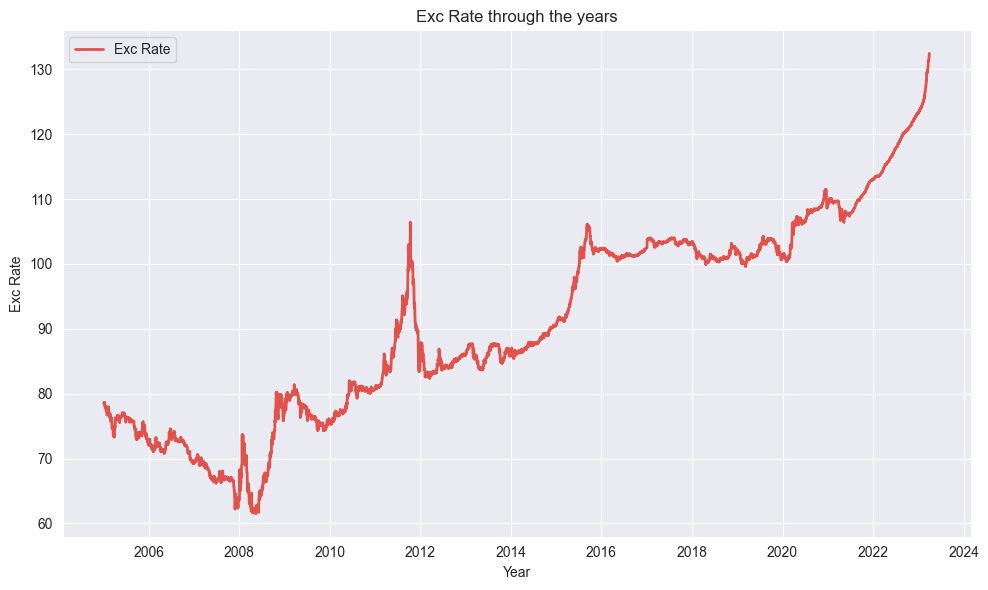

In [68]:
# plotting exchange rate
plot_time_series(main_df,"Exc Rate")

The exchange rate experienced a drop from 2005 to 2007 before going up since 2008 all the way to 2023. This can be attributed to increased rates of importing to exporting which has resulted to the weakening of the Kenyan Shilling against the dollar. The price being the lowest in 2008 is explained by the global recession that negatively affected the strength of the dollar.

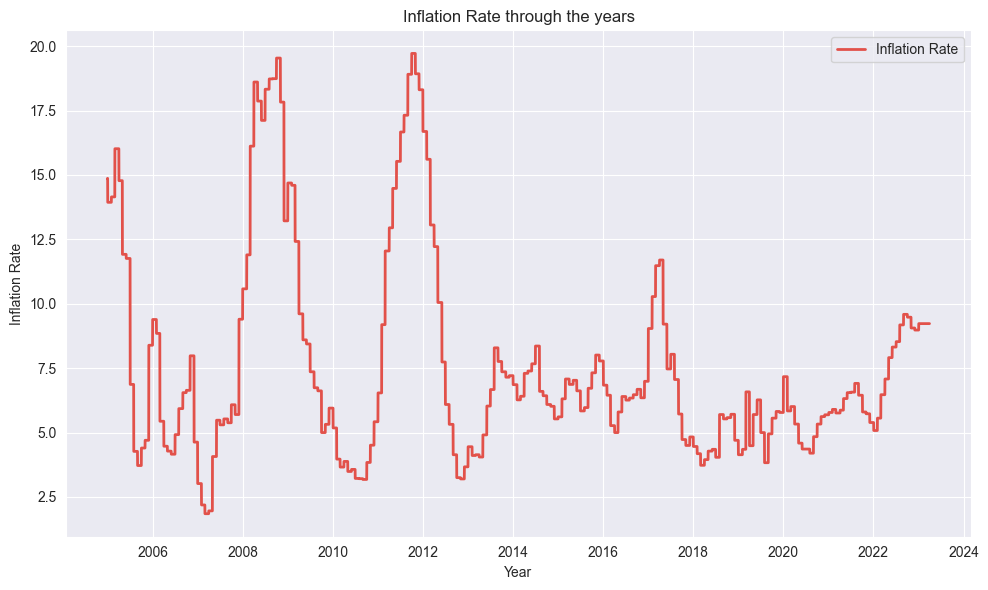

In [69]:
# plotting inflation
plot_time_series(main_df,"Inflation Rate")

The inflation rates are seen to be fluctuating over the years, with the highest value being in 2012. 

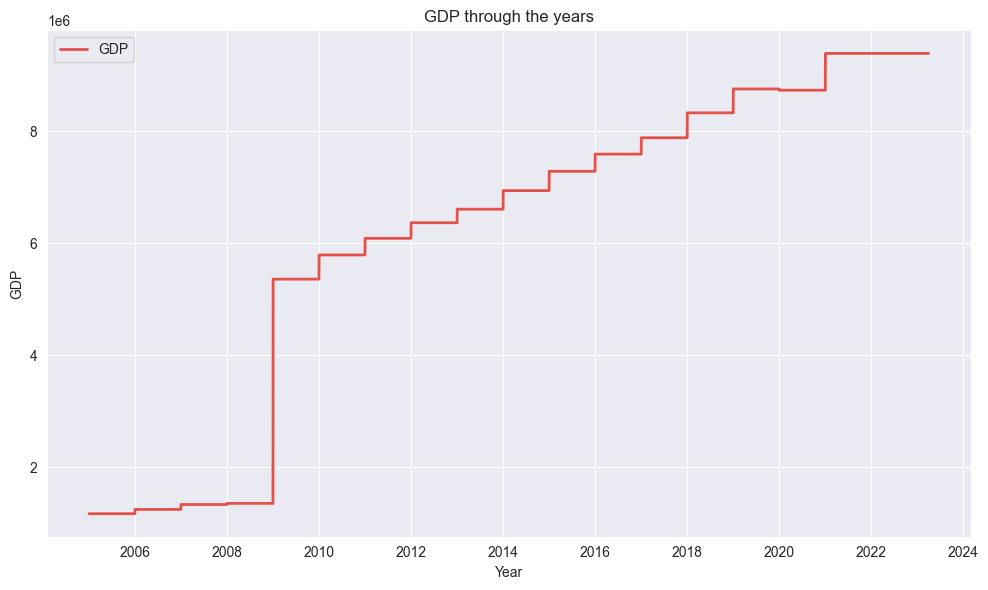

In [70]:
# plotting GDP
plot_time_series(main_df,"GDP")

The GDP has been going up. This shows that the economy has been growing in an upward trajectory.

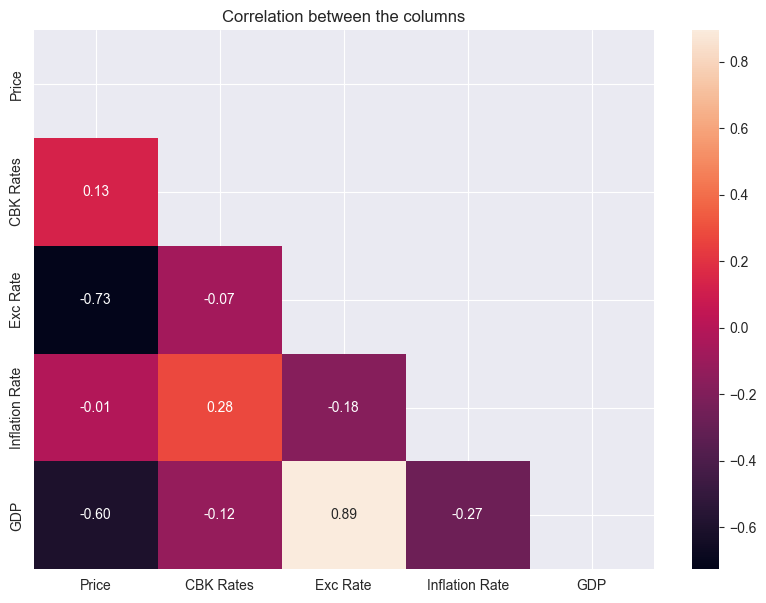

In [71]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(main_df.corr(), dtype=bool))
sns.heatmap(main_df.corr(),annot=True,fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

According to the heatmap, CBK rates are the most positively correlated to Price while the inflation rates are the most negatively correlated to Price.

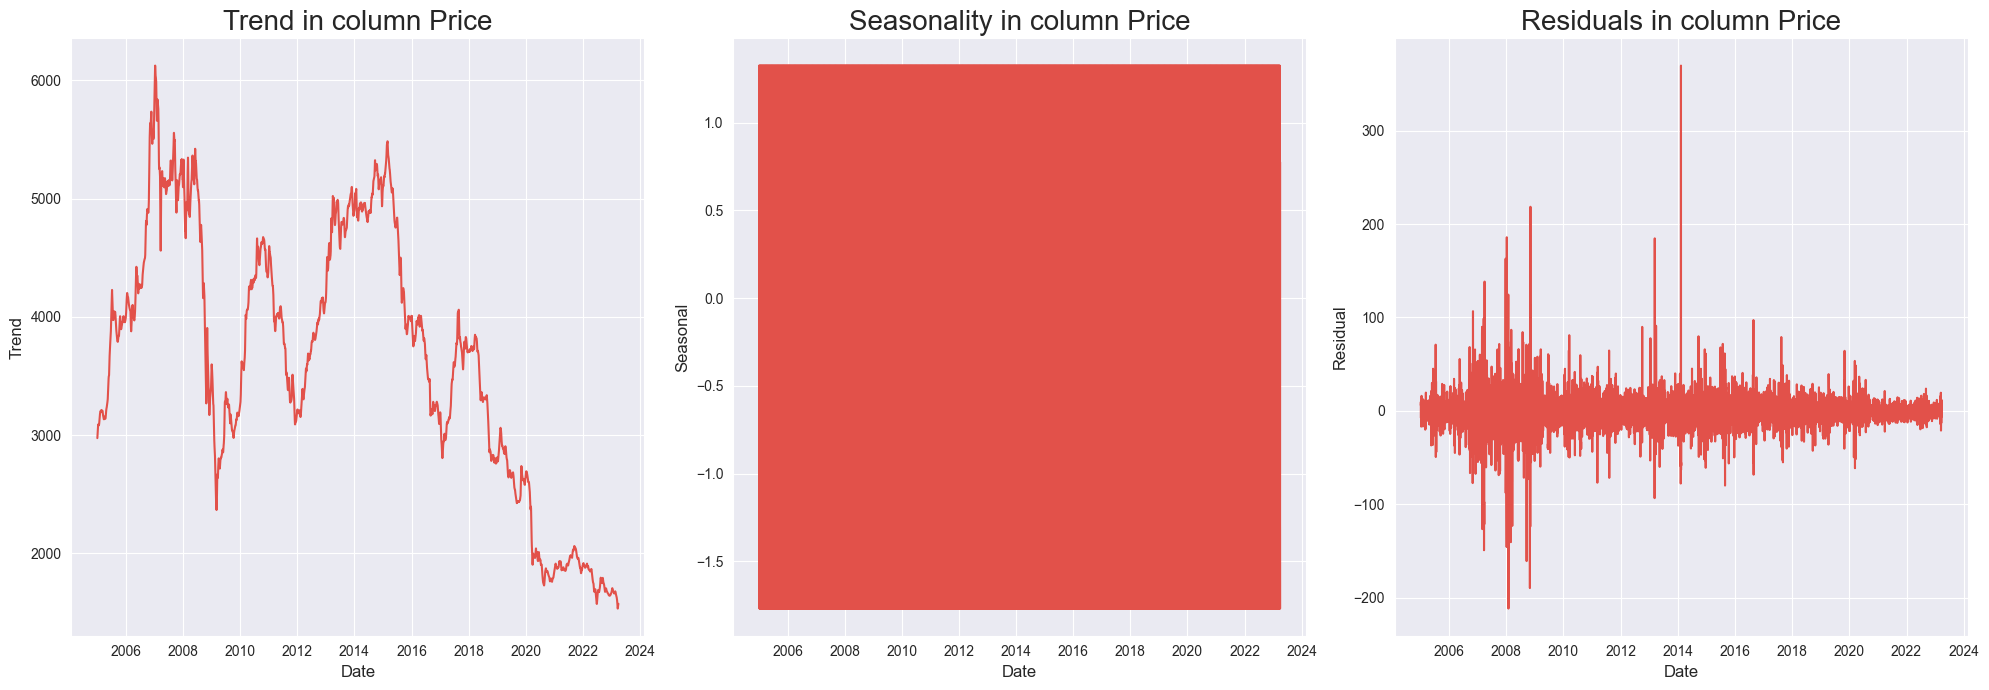

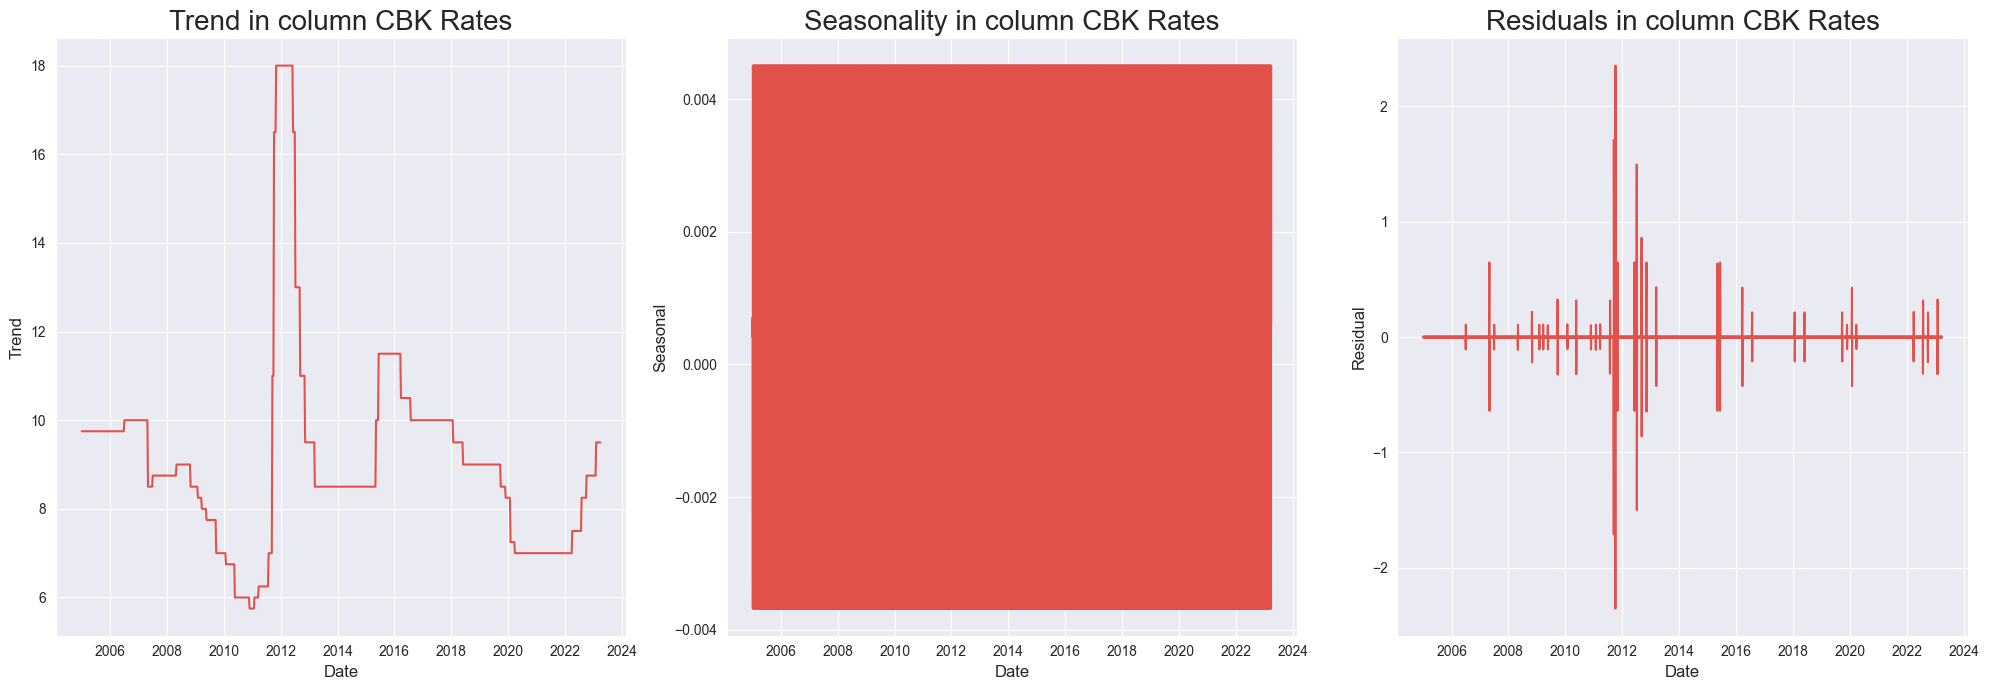

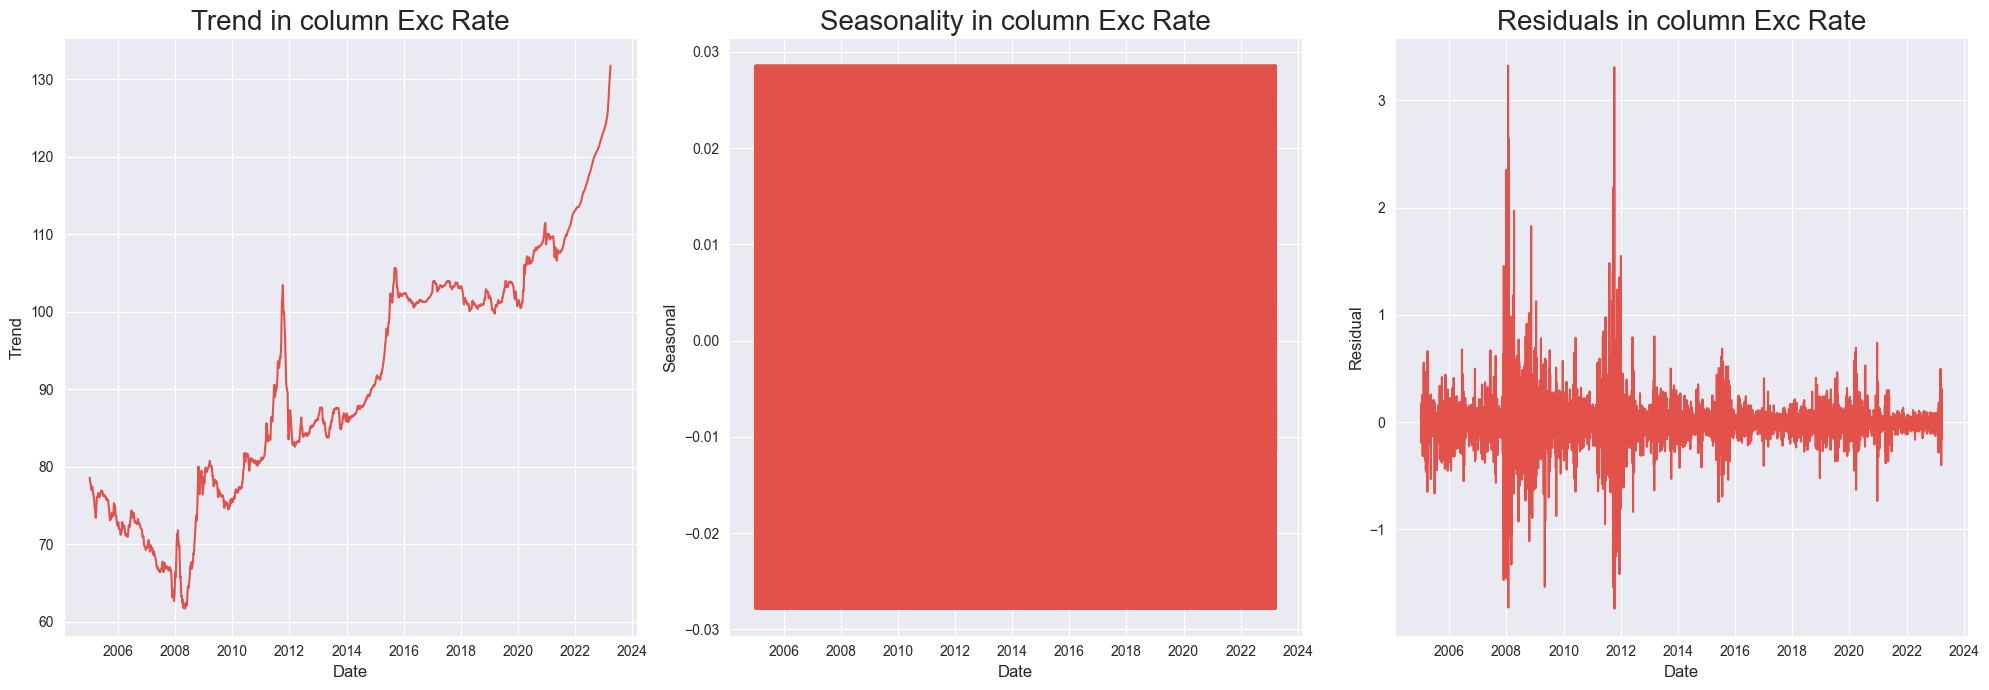

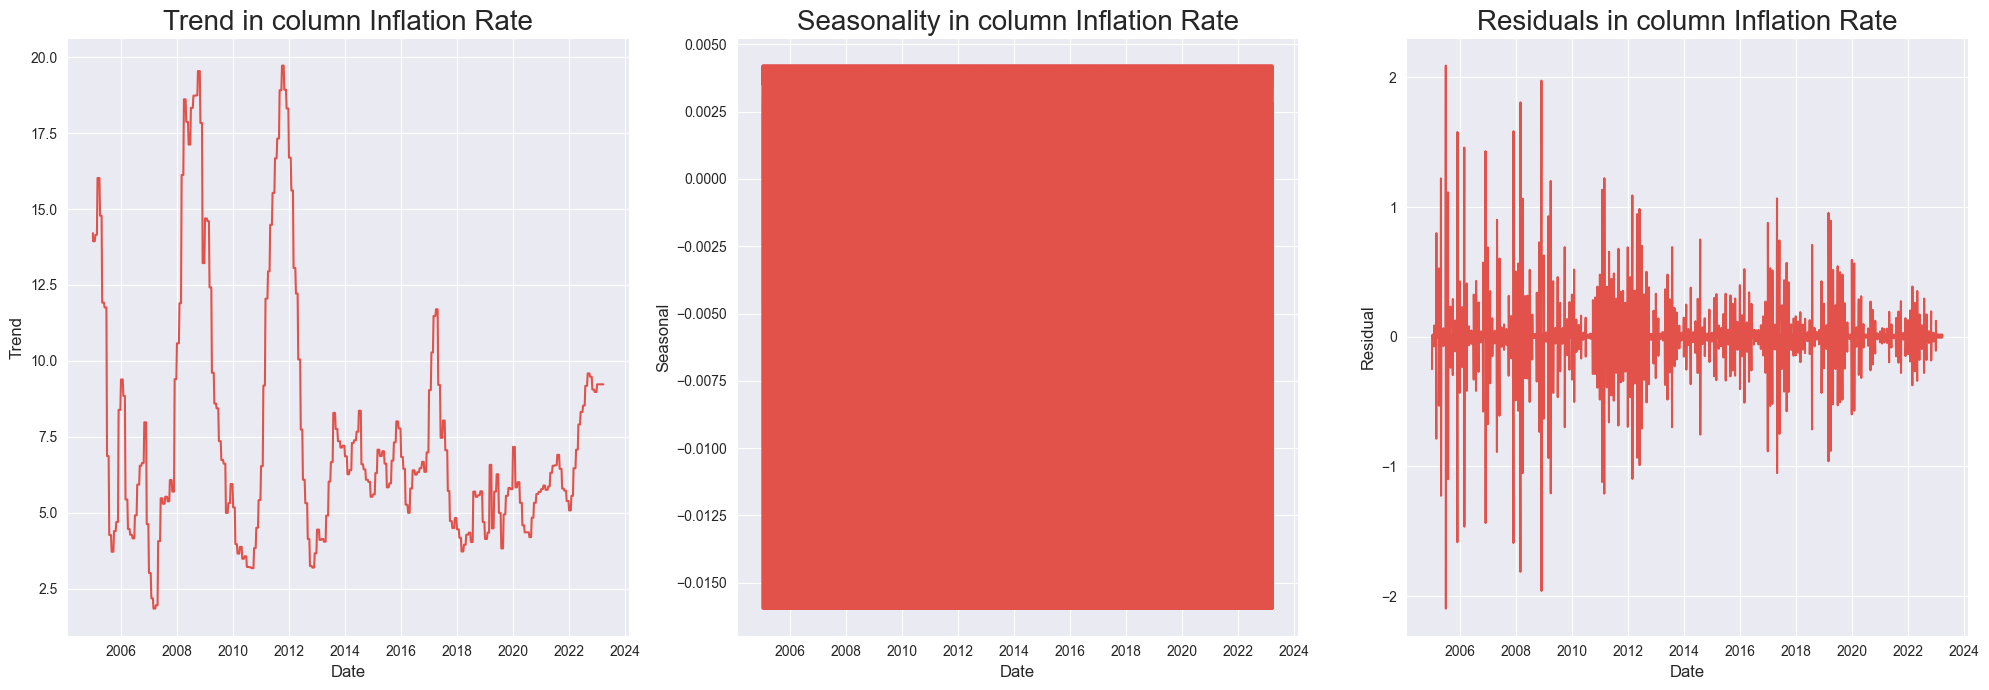

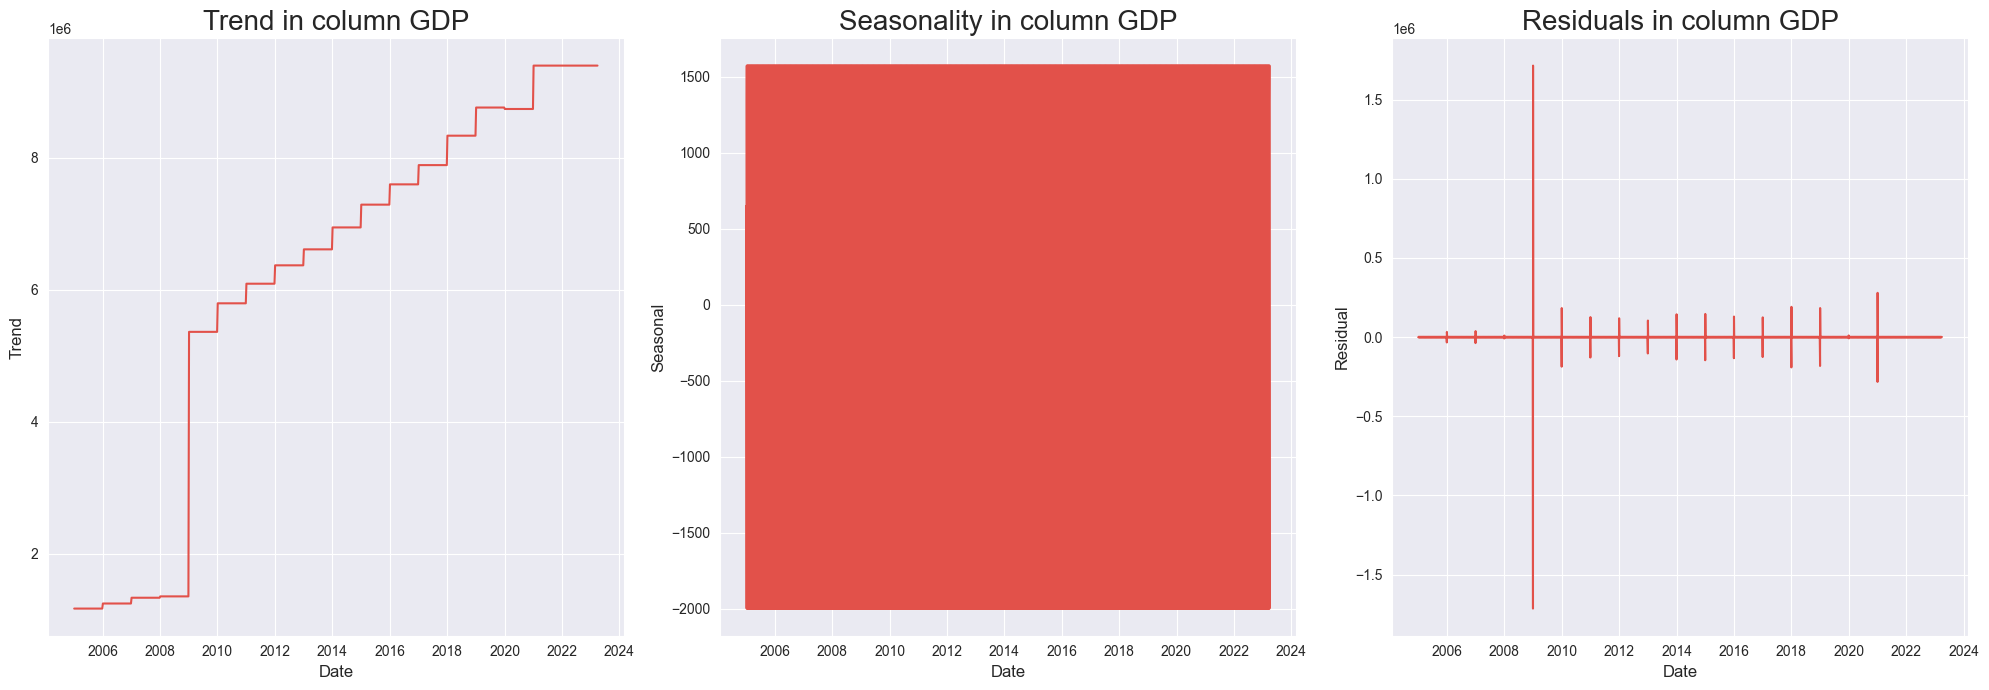

In [72]:
# Decompose time series into trend, seasonality, and residuals
for i,col in enumerate(main_df.columns):
    fig,axes = plt.subplots(ncols=3,figsize=(20,7))
    trend_ax = axes[0]
    seasonal_ax = axes[1]
    resid_ax = axes[2]
    
    result = seasonal_decompose(main_df[col],model="additive")
    trend_ax.plot(result.trend)
    trend_ax.set_ylabel('Trend',fontsize=12)
    trend_ax.set_xlabel('Date',fontsize=12)
    trend_ax.set_title(f'Trend in column {col}',fontsize=20)
    
    seasonal_ax.plot(result.seasonal)
    seasonal_ax.set_ylabel('Seasonal',fontsize=12)
    seasonal_ax.set_xlabel('Date',fontsize=12)
    seasonal_ax.set_title(f'Seasonality in column {col}',fontsize=20)
    
    resid_ax.plot(result.resid)
    resid_ax.set_ylabel('Residual',fontsize=12)
    resid_ax.set_xlabel('Date',fontsize=12)
    resid_ax.set_title(f'Residuals in column {col}',fontsize=20)
    
    plt.tight_layout()
    plt.show()
        

These graphs show the trend, seasonality and noise components of the time series in the dataset. 

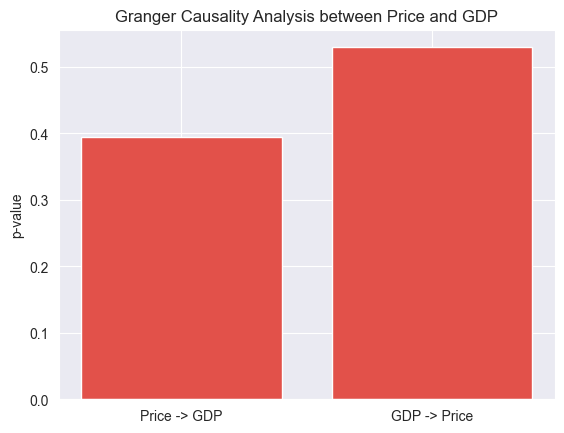

In [73]:
# Perform Granger Causality Analysis
gc_gdp = grangercausalitytests(main_df[["Price","GDP"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = [gc_gdp[1][0]['ssr_ftest'][i] for i in range(2)]
plt.bar(['Price -> GDP', 'GDP -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and GDP')
plt.ylabel('p-value')
plt.show()

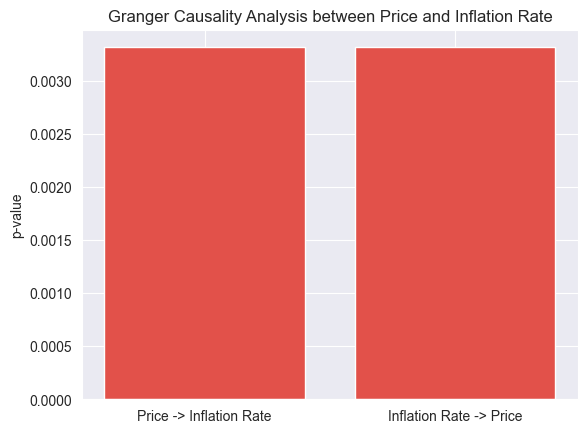

In [74]:
# Perform Granger Causality Analysis
gc_inf = sm.tsa.stattools.grangercausalitytests(main_df[["Price","Inflation Rate"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_inf[1][0]['ssr_ftest'][1]
plt.bar(['Price -> Inflation Rate', 'Inflation Rate -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and Inflation Rate')
plt.ylabel('p-value')
plt.show()

According to the graphs above, the p-values are less than 0.05 which means that both Price and Inflation rates can be used to predict the other hence showing possible causality.

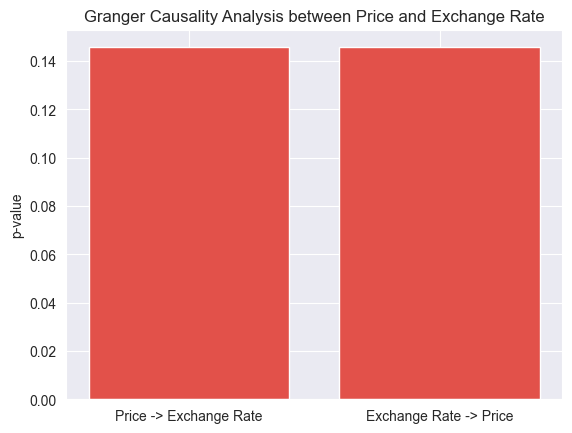

In [75]:
# Perform Granger Causality Analysis
gc_exc = sm.tsa.stattools.grangercausalitytests(main_df[["Price","Exc Rate"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_exc[1][0]['ssr_ftest'][1]
plt.bar(['Price -> Exchange Rate', 'Exchange Rate -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and Exchange Rate')
plt.ylabel('p-value')
plt.show()

The p-value is this case is greater than 0.05, which means that Price and Exchange Rate do not necessarily have a causal relationship and can therefore not be used to predict each other.

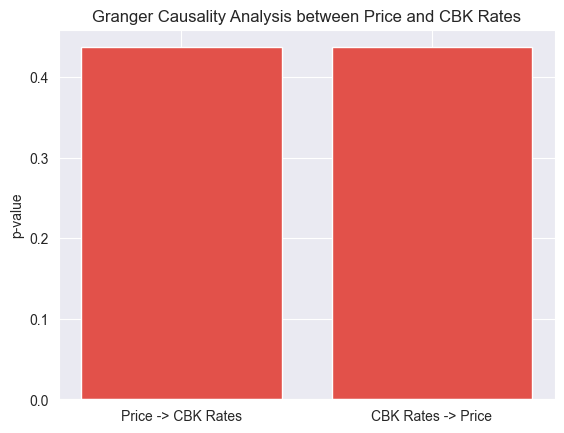

In [76]:
# Perform Granger Causality Analysis
gc_cbk = sm.tsa.stattools.grangercausalitytests(main_df[["Price","CBK Rates"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_cbk[1][0]['ssr_ftest'][1]
plt.bar(['Price -> CBK Rates', 'CBK Rates -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and CBK Rates')
plt.ylabel('p-value')
plt.show()

The p-value, being greater than 0.05 means that Price and CBK Rates do not have a causal relationship.

## 7. Data Preprocessing
### 7.1 Checking for Stationarity

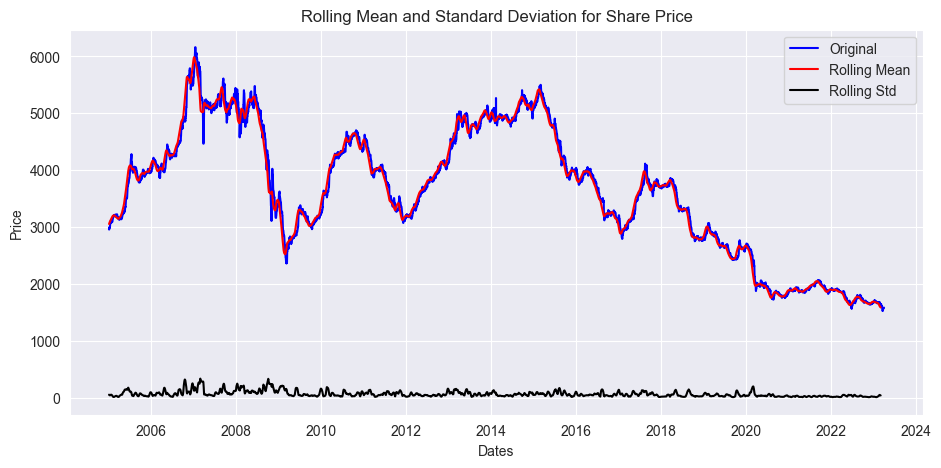

In [77]:
# plotting graph of rolling mean and rolling standard deviation against share price
rollingmean = main_df.Price.rolling(window = 30, center = False).mean()
rollingstd = main_df.Price.rolling(window = 30, center = False).std()

fig = plt.figure(figsize=(11,5))
orig = plt.plot(main_df.Price, color='blue',label='Original')
mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation for Share Price')
plt.show()

From the graph, the data does not appear to be stationary since the rolling mean is not constant.

In [78]:
result = adfuller(main_df["Price"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.925891
p-value: 0.319981


The p-value is 0.32 therefore we fail to reject the null hypothesis and determine that the data is not stationary. The data will need to be differenced so that it becomes stationary and fit for modelling

## 8. Modelling
### 8.1 ARIMA Model

In [79]:
# creating time series for baseline model
baseline_series = main_df.Price
baseline_series.head()

Date
2023-03-31    1581.11
2023-03-30    1581.11
2023-03-29    1581.11
2023-03-28    1581.11
2023-03-27    1568.94
Name: Price, dtype: float64

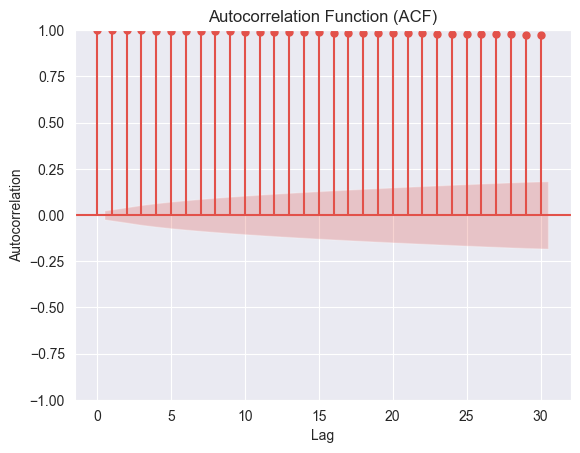

In [80]:
# Plot ACF
plot_acf(baseline_series, lags=30)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()

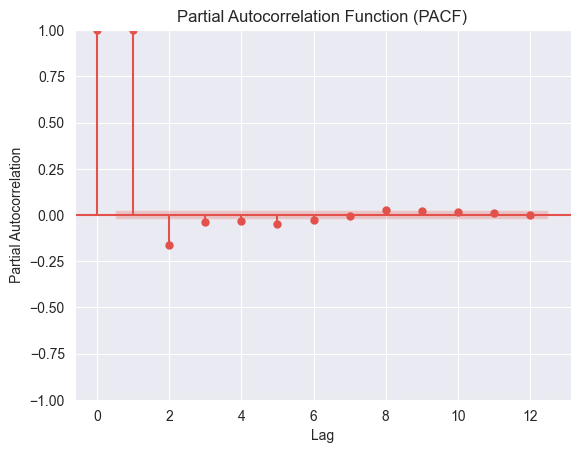

In [81]:
# Plot PACF
plot_pacf(baseline_series, lags=12)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [82]:
# using auto arima to find the best p,d,q for our model
model = auto_arima(baseline_series, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62030.492, Time=4.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62465.206, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62063.497, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62105.776, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62463.617, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=62029.314, Time=1.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=62071.847, Time=1.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62046.263, Time=1.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=62029.233, Time=3.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=62064.765, Time=1.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=61996.807, Time=6.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=61988.795, Time=10.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=61986.862, Time=5.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62026.568, Time=3.55 sec
 ARIMA(4,1,2)(0,0,

In [83]:
# splitting time series to train and test
train = baseline_series[:'2017-12-31']
test = baseline_series['2018-01-01':]

In [84]:
# Building the Baseline Model
ARIMA_model = ARIMA(train, order=(3,1,2))
ARIMA_model = ARIMA_model.fit()

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates

In [85]:
print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4748
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -22706.543
Date:                Thu, 13 Apr 2023   AIC                          45425.086
Time:                        21:54:36   BIC                          45463.877
Sample:                             0   HQIC                         45438.717
                               - 4748                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7429      0.021     83.902      0.000       1.702       1.784
ar.L2         -1.2040      0.025    -48.476      0.000      -1.253      -1.155
ar.L3          0.2096      0.008     27.119      0.0

The p-value for the Ljung-Box test is 0.96 which is greater than 0.05. So we fail to reject the null hypothesis. Meaning that our data has no autocorrelation.

The p-value for Jarque-Bera test is 0.00 which is less than 0.05. We therefore reject the null hypothesis and conclude that our data is not normally distributed. 

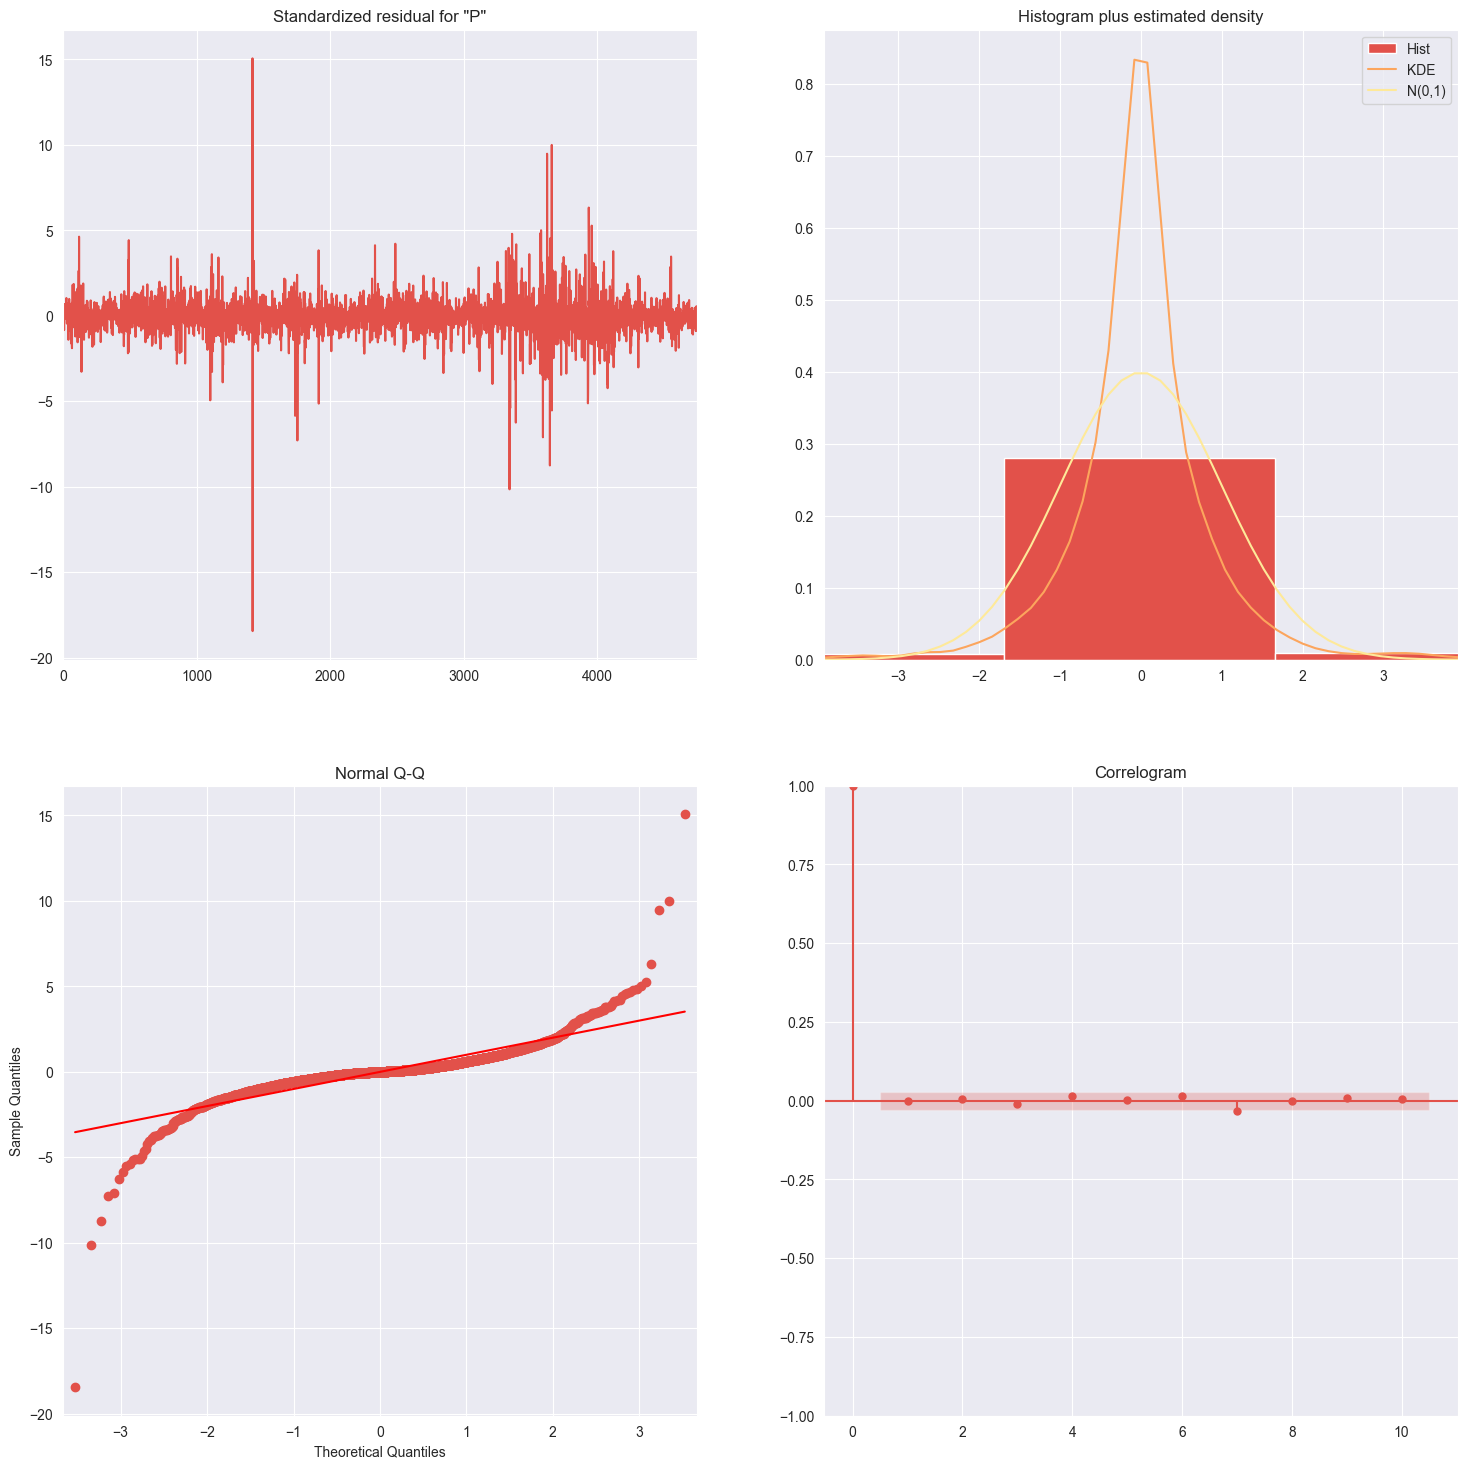

In [86]:
# Model Diagnostics
ARIMA_model.plot_diagnostics(figsize=(18,18))
plt.show()

The first graph shows stationarity in the residual data.

The histogram shows a majority of the values are concentrated around the mean, this means that the plotted residuals follow a normal distribution.

In [87]:
# long runtime, uncomment on final notebook
# history = [x for x in train]
# # make predictions
# predictions = []
# for t in range(len(test)):
#     model = ARIMA(history, order=(3,1,2))
#     model_fit = model.fit()
#     yhat = model_fit.forecast()[0]
#     predictions.append(yhat)
#     history.append(test[t])

# # saving the predictions to prevent rerunning the code as it has a long runtime     
# arima_model_predictions=pd.DataFrame(predictions,index=test.index)    
# arima_model_predictions.to_csv("Datasets/ARIMA model predictions.csv")

In [88]:
# loading prediction dataset
arima_preds = pd.read_csv("Datasets/ARIMA model predictions.csv")
arima_preds.head()

,Date,0
0,2023-03-31,2954.486314
1,2023-03-30,1269.065847
2,2023-03-29,1536.788779
3,2023-03-28,1511.021609
4,2023-03-27,1516.595142


In [89]:
# preparing predictions dataframe for plotting
arima_preds.Date = pd.to_datetime(arima_preds.Date)
arima_preds.set_index("Date",inplace=True)

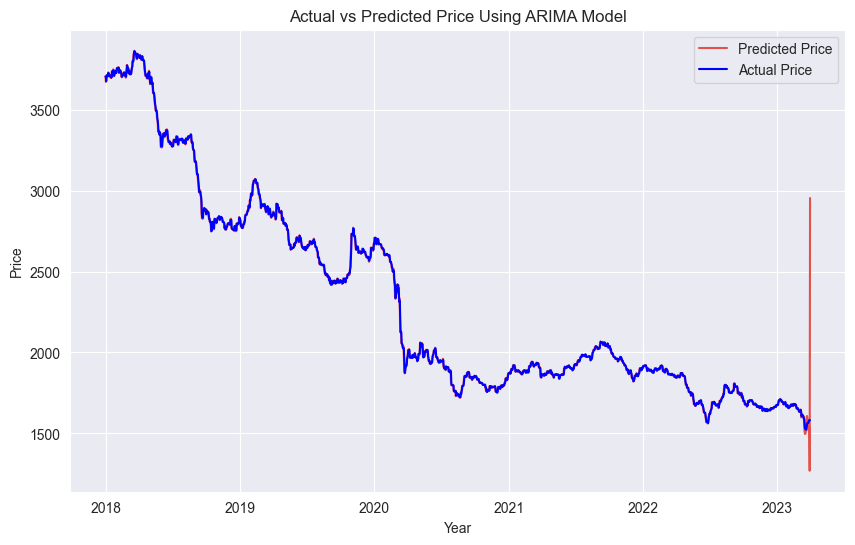

In [90]:
# plotting predictions vs actual values
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(arima_preds,label="Predicted Price")
ax.plot(test,label="Actual Price",c="b")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.set_title("Actual vs Predicted Price Using ARIMA Model")
plt.legend();

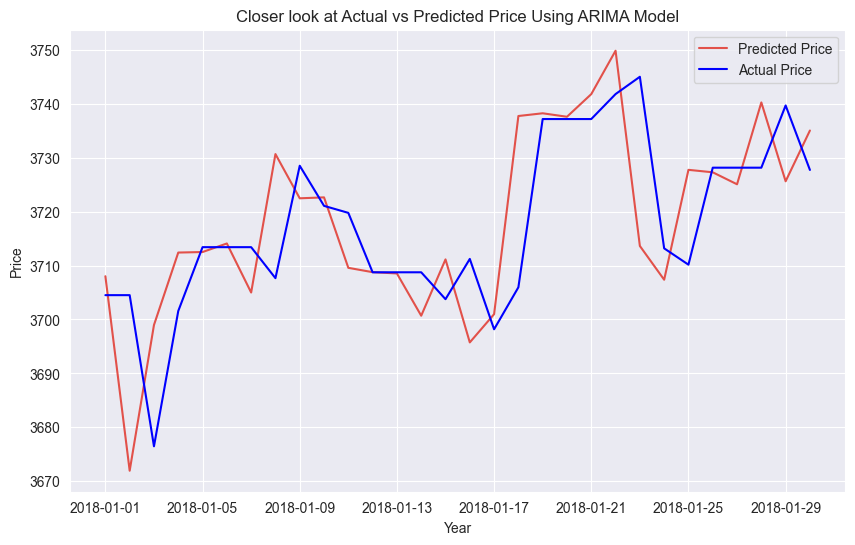

In [91]:
# plotting predictions vs actual values
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(arima_preds[-30:],label="Predicted Price")
ax.plot(test[-30:],label="Actual Price",c="b")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.set_title("Closer look at Actual vs Predicted Price Using ARIMA Model")
plt.legend();

In [92]:
#evaluating model perfomance using mean absolute error
mae = mean_absolute_error(test, arima_preds)
print('Mean Absolute Error(MAE):', mae)

Mean Absolute Error(MAE): 8.875110889874373


The ARIMA model has an MAE of 8.87 which means that our predictions for the daily stock prices will be off by kshs 8.87.  However, the predictive power of this model for in the context of stock prices is questionable because it is heavily reliant on previous values to a point where the predicted values look like they're shifted from the actual values at a certain lag.

### 8.2 Prophet Model

In [93]:
# Building the prophet model
# Changing the column names for the prophet library
proph_df = train.reset_index()
proph_df.rename(columns={"Date":"ds","Price":"y"},inplace=True)

In [94]:
# Fitting the prophet model
model = Prophet()
model.fit(proph_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

21:54:41 - cmdstanpy - INFO - Chain [1] start processing
21:54:46 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
# previewing the forecast
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5108,2018-12-27,2614.006989,1506.619509,3667.389506,1572.981972,3646.337129,-57.885821,-57.885821,-57.885821,-1.953921,-1.953921,-1.953921,-55.931901,-55.931901,-55.931901,0.0,0.0,0.0,2556.121168
5109,2018-12-28,2612.647080,1447.320221,3699.681539,1567.578573,3649.929391,-50.007837,-50.007837,-50.007837,1.330403,1.330403,1.330403,-51.338241,-51.338241,-51.338241,0.0,0.0,0.0,2562.639242
5110,2018-12-29,2611.287170,1428.838197,3712.728013,1562.195812,3653.521652,-45.045280,-45.045280,-45.045280,1.320163,1.320163,1.320163,-46.365442,-46.365442,-46.365442,0.0,0.0,0.0,2566.241890
5111,2018-12-30,2609.927261,1447.550433,3653.728382,1557.076114,3657.113914,-39.670089,-39.670089,-39.670089,1.406271,1.406271,1.406271,-41.076360,-41.076360,-41.076360,0.0,0.0,0.0,2570.257171
5112,2018-12-31,2608.567351,1485.818755,3650.219133,1552.073002,3660.706176,-34.659060,-34.659060,-34.659060,0.882331,0.882331,0.882331,-35.541391,-35.541391,-35.541391,0.0,0.0,0.0,2573.908291


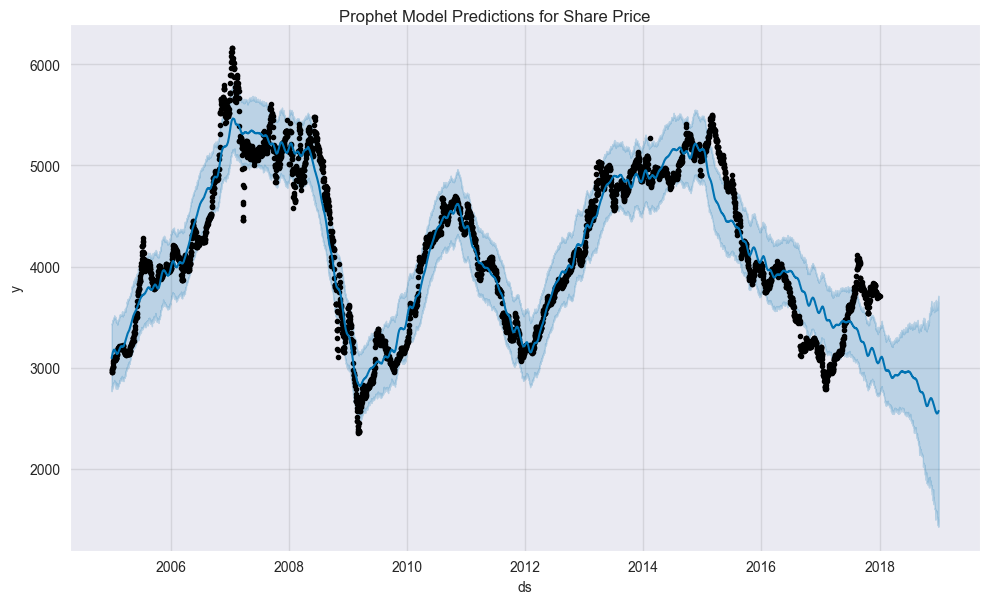

In [120]:
# Visualizing 
fig1 = model.plot(forecast)
fig1.suptitle("Prophet Model Predictions for Share Price",y=1);

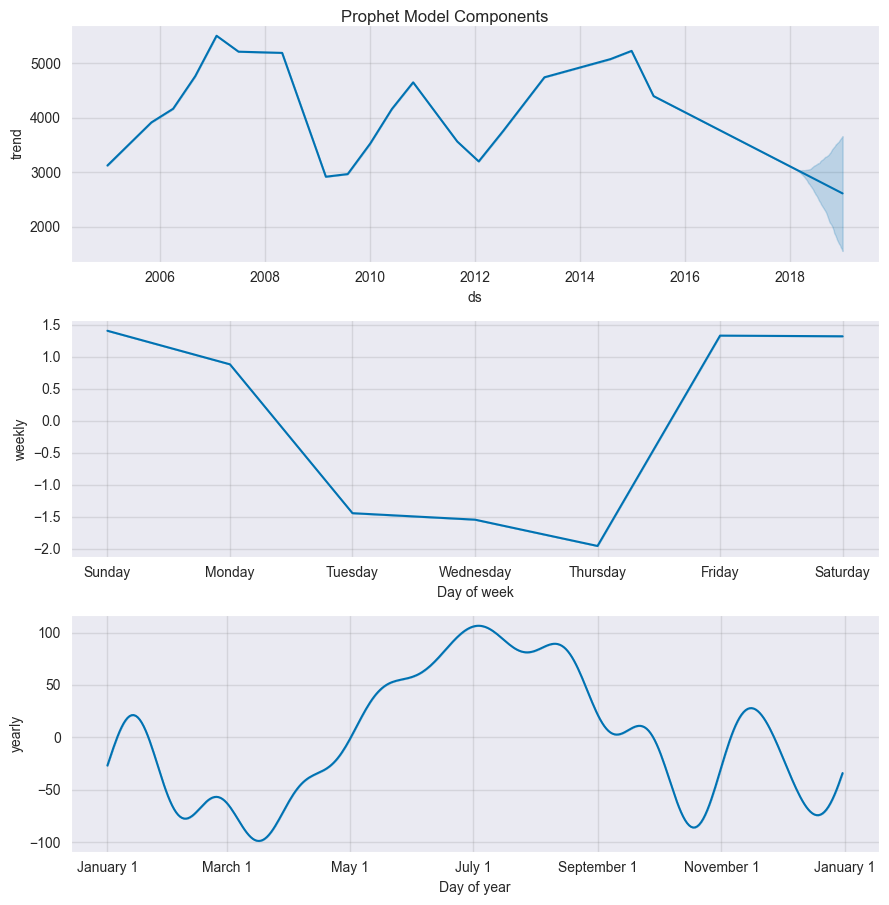

In [122]:
fig2 = model.plot_components(forecast)
fig2.suptitle("Prophet Model Components",y=1);

In [101]:
#evaluating our prophet model
actual = test.values[-365:]
predicted = forecast[-365:].sort_values(by="ds",ascending=False)['yhat']

In [102]:
#overview of the forecasted dataset
forecast[-365:].sort_values(by="ds",ascending=False).head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5112,2018-12-31,2608.567351,1495.040694,3628.939363,1598.780322,3679.343407,-34.659060,-34.659060,-34.659060,0.882331,0.882331,0.882331,-35.541391,-35.541391,-35.541391,0.0,0.0,0.0,2573.908291
5111,2018-12-30,2609.927261,1553.374410,3670.515203,1605.462816,3675.774513,-39.670089,-39.670089,-39.670089,1.406271,1.406271,1.406271,-41.076360,-41.076360,-41.076360,0.0,0.0,0.0,2570.257171
5110,2018-12-29,2611.287170,1589.134321,3679.044225,1612.145309,3672.205620,-45.045280,-45.045280,-45.045280,1.320163,1.320163,1.320163,-46.365442,-46.365442,-46.365442,0.0,0.0,0.0,2566.241890
5109,2018-12-28,2612.647080,1524.096350,3664.421318,1618.827802,3666.425056,-50.007837,-50.007837,-50.007837,1.330403,1.330403,1.330403,-51.338241,-51.338241,-51.338241,0.0,0.0,0.0,2562.639242
5108,2018-12-27,2614.006989,1530.960527,3586.838604,1625.618452,3660.208738,-57.885821,-57.885821,-57.885821,-1.953921,-1.953921,-1.953921,-55.931901,-55.931901,-55.931901,0.0,0.0,0.0,2556.121168


In [103]:
#evaluating our model using the mean absolute error
mae = mean_absolute_error(actual, predicted)
print('Mean Absolute Error(MAE):', mae)

Mean Absolute Error(MAE): 465.26342171662515


This prophet model gives a mean absolute error of 465.3 for a one year forecast. This means that if this model makes a prediction for the share price one year from now, it would be off by kshs 465.3

### 8.3 Prophet Model with Regressors

In [123]:
#creating an imput feature x and splitting the data into train and test set
X = main_df[['CBK Rates','Exc Rate', 'Inflation Rate', 'GDP']]
X_train = X[:'2017-12-31']
X_test = X['2018-01-01':]

In [124]:
#standerdizing our values into a common scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3
0,0.201654,1.625157,-0.752652,1.121169
1,0.201654,1.625157,-0.752652,1.121169
2,0.201654,1.625157,-0.752652,1.121169
3,0.201654,1.633595,-0.752652,1.121169
4,0.201654,1.629376,-0.752652,1.121169


In [125]:
#renaming our columns
X_scaled = X_scaled.rename(columns = {0:'CBK Rates',1:'Exc Rate', 2:'Inflation Rate', 3:'GDP'})

In [126]:
#joining the datasets to have a final data for our regressors and target
joined_df = pd.merge(X_scaled, proph_df, left_index = True, right_index = True, how = 'outer')

In [127]:
#adding regressors in our model
proph_model = Prophet()
proph_model.add_regressor("CBK Rates")
proph_model.add_regressor("Exc Rate")
proph_model.add_regressor("Inflation Rate")
proph_model.add_regressor("GDP")
proph_model.fit(joined_df)

22:04:11 - cmdstanpy - INFO - Chain [1] start processing
22:04:18 - cmdstanpy - INFO - Chain [1] done processing


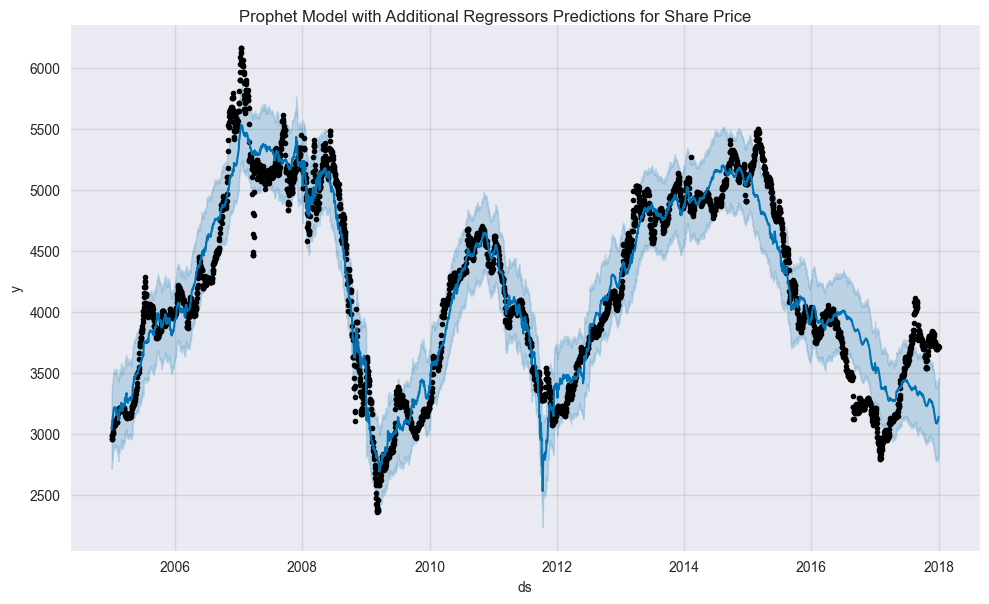

In [144]:
#Fitting the data and making predictions
future_data = proph_model.make_future_dataframe(periods=365)#forecast the data for Test  data
forecast_data = proph_model.predict(joined_df)
fig3 = proph_model.plot(forecast_data)
fig3.suptitle("Prophet Model with Additional Regressors Predictions for Share Price",y=1);

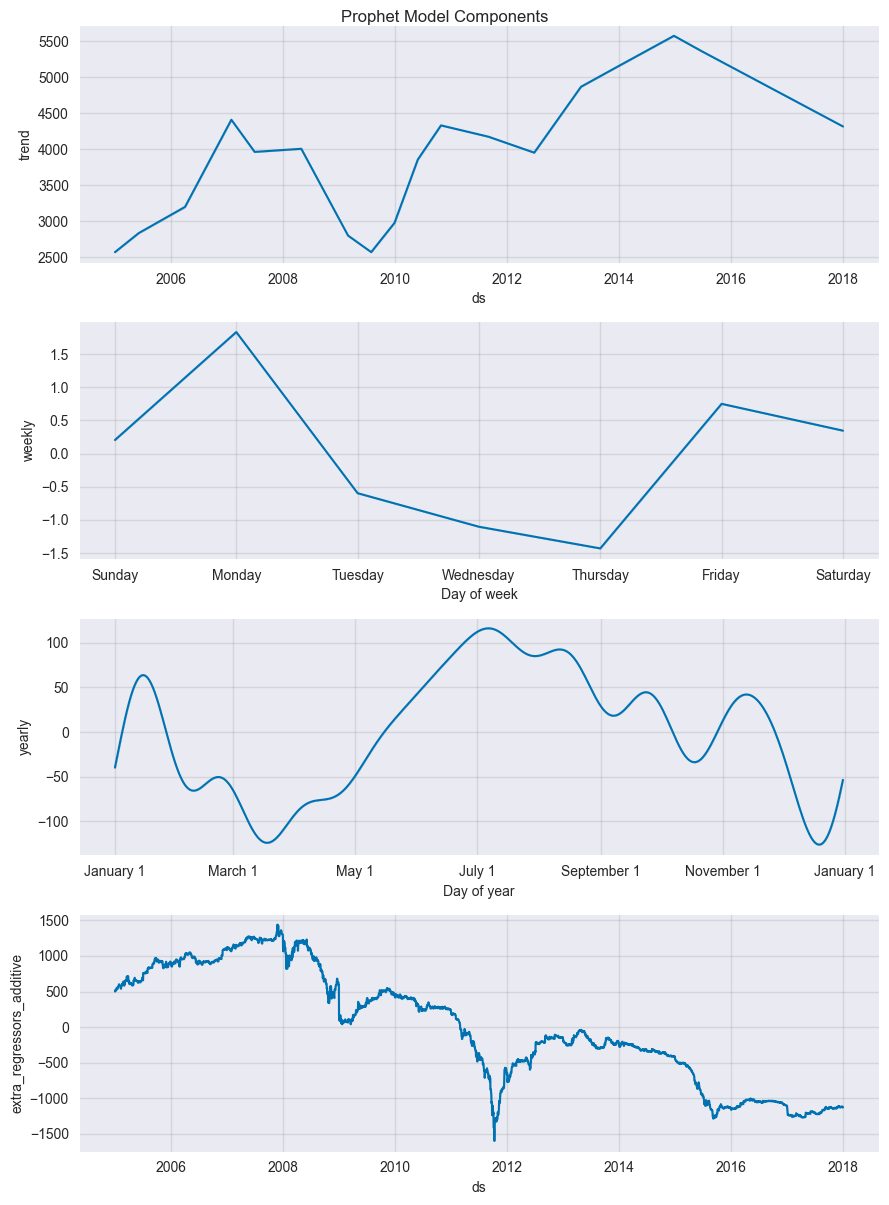

In [130]:
fig4 = proph_model.plot_components(forecast_data)
fig4.suptitle("Prophet Model Components",y=1);

In [131]:
#defining the predicted dataset
predicted_1 = forecast_data[-365:].sort_values(by="ds",ascending=False)['yhat']
predicted_1 = pd.DataFrame(predicted_1)
predicted_1.head()

,yhat
4747,3139.418634
4746,3130.106366
4745,3121.552222
4744,3106.476932
4743,3101.505334


In [132]:
#actual dataset
actual_1 = joined_df['y'][:365]
actual_1 = pd.DataFrame(actual_1)
actual_1.head()

,y
0,3711.94
1,3711.94
2,3711.94
3,3711.64
4,3714.15


In [133]:
#evaluating our model perfomance using mean absolute error
mae = mean_absolute_error(actual_1, predicted_1)
print('Mean Absolute Error(MAE):', mae)

Mean Absolute Error(MAE): 373.92124592510703


The prophet model with additional regressor features gives a mean absolute error of 373.9 for a one year forecast. This means that if this model makes a prediction for the share price one year from now, it would be off by 373.9 Ksh.

In [134]:
# finding the coefficients of the prophet model
regressor_coef = regressor_coefficients(proph_model)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

,regressor,regressor_mode,coef
1,Exc Rate,additive,-541.153327
3,GDP,additive,-262.827595
2,Inflation Rate,additive,-87.357221
0,CBK Rates,additive,-85.130704


According to the Prophet model, the coefficients give the following information:
- For an increase in exchange rate by 1 Ksh with the US dollar, the share price decreases by 541.2 Kshs
- For an increase in GDP by 1 million, the share price decreases by 262.8 Kshs
- For an increase in inflation rate by 1%, the share price decreases by 87.4 Kshs
- For an increase in CBK rate by 1%, the share price decreases by 85.1 Kshs

Changepoints are basically abrupt changes in a time series model which could be used as indicators of external factors affecting the trend.

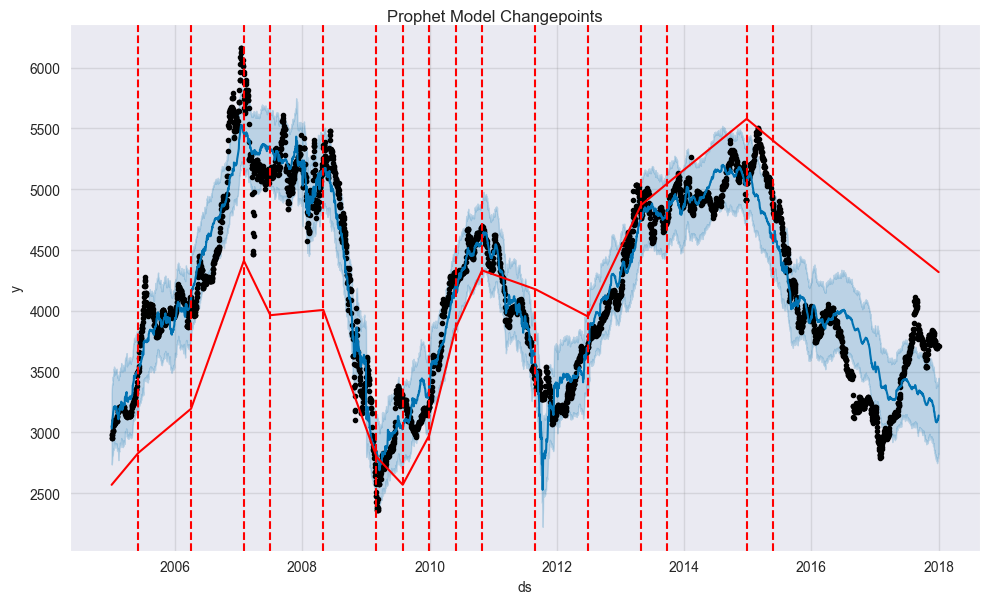

In [135]:
# plotting changepoints
fig = proph_model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), proph_model, forecast_data)
fig.suptitle("Prophet Model Changepoints",y=1);

In [121]:
# previewing changepoints
pd.DataFrame(proph_model.changepoints).head()

,ds
152,2005-06-02
304,2005-11-01
456,2006-04-02
608,2006-09-01
759,2007-01-30


It is possible that the changepoints are clustered at the end of the month because that is when businesses often close their books and release financial reports. This could lead to changes in the market sentiment, which could affect NSE values.

### 8.3 VAR Model

In [122]:
# Previewing the data
joined_df.head()

,CBK Rates,Exc Rate,Inflation Rate,GDP,ds,y
0,0.201654,1.625157,-0.752652,1.121169,2017-12-31,3711.94
1,0.201654,1.625157,-0.752652,1.121169,2017-12-30,3711.94
2,0.201654,1.625157,-0.752652,1.121169,2017-12-29,3711.94
3,0.201654,1.633595,-0.752652,1.121169,2017-12-28,3711.64
4,0.201654,1.629376,-0.752652,1.121169,2017-12-27,3714.15


In [123]:
var_df = joined_df.copy()
var_df = var_df.rename(columns={'y':'Price', 'ds':'Date'})

In [124]:
var_df.set_index("Date",inplace=True)

In [125]:
var_df.head()

,CBK Rates,Exc Rate,Inflation Rate,GDP,Price
Date,,,,,
2017-12-31,0.201654,1.625157,-0.752652,1.121169,3711.94
2017-12-30,0.201654,1.625157,-0.752652,1.121169,3711.94
2017-12-29,0.201654,1.625157,-0.752652,1.121169,3711.94
2017-12-28,0.201654,1.633595,-0.752652,1.121169,3711.64
2017-12-27,0.201654,1.629376,-0.752652,1.121169,3714.15


In [126]:
test1 = test.copy()
test1.head()

Date
2023-03-31    1581.11
2023-03-30    1581.11
2023-03-29    1581.11
2023-03-28    1581.11
2023-03-27    1568.94
Name: Price, dtype: float64

In [127]:
test1 = test1[-365:]
test1.shape

(365,)

In [128]:
test1_df = pd.DataFrame(test1)
test1_df = test1_df.rename(columns={'Price':'Actual'})
test1_df.head()

,Actual
Date,
2018-12-31,2833.84
2018-12-30,2800.95
2018-12-29,2800.95
2018-12-28,2800.95
2018-12-27,2793.28


In [129]:
var_model = VARMAX(var_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                                Statespace Model Results                                               
Dep. Variable:     ['CBK Rates', 'Exc Rate', 'Inflation Rate', 'GDP', 'Price']   No. Observations:                 4748
Model:                                                                  VAR(4)   Log Likelihood               13408.079
                                                                   + intercept   AIC                         -26576.157
Date:                                                         Thu, 13 Apr 2023   BIC                         -25800.300
Time:                                                                 21:38:50   HQIC                        -26303.518
Sample:                                                                      0                                         
                                                                        - 4748                                         
Covariance Type:                        

In [130]:
n_forecast = 365
predict = fitted_model.get_prediction(start=len(var_df),end=len(var_df) + n_forecast-1)

predictions=predict.predicted_mean

price_pred = predictions.Price
price_pred_df = pd.DataFrame(price_pred)
price_pred_df.head()

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,Price
4748,2955.937459
4749,2963.144173
4750,2967.357534
4751,2971.157789
4752,2975.133596


In [131]:
# dataframe to plot predictions vs actual values
to_plot = test1_df.reset_index().merge(price_pred_df.reset_index(),
                                       left_index=True,right_index=True).set_index("Date").drop("index",axis=1)
to_plot.head()

,Actual,Price
Date,,
2018-12-31,2833.84,2955.937459
2018-12-30,2800.95,2963.144173
2018-12-29,2800.95,2967.357534
2018-12-28,2800.95,2971.157789
2018-12-27,2793.28,2975.133596


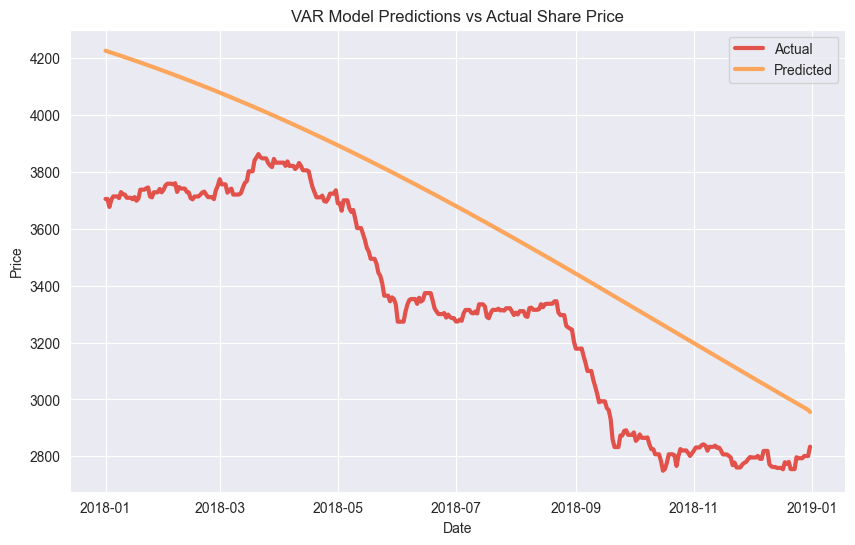

In [140]:
# Visualizing the predictions
plt.figure(figsize=(10,6))
plt.plot(to_plot.Actual,label="Actual",linewidth=3)
plt.plot(to_plot.Price,label="Predicted",linewidth=3)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("VAR Model Predictions vs Actual Share Price")
plt.legend();

In [133]:
#evaluating our model perfomance using mean absolute error
mae = mean_absolute_error(test1, price_pred)
print('Mean Absolute Error(MAE):', mae)

Mean Absolute Error(MAE): 325.7423849125244


The mae for this model is 356.75 meaning that our predictions  will err by kshs 356 on the yearly predictions.

The metric of success was set such that the best performing model would be the one with the least value of MAE. In this case, that would be the VAR model. However, this model failed to capture the complexity of the dataset and its predictions are more or less in a straight line as seen in the evaluation. The prophet model with regressors was more detailed and gave more insight on the predictiond, it even shows the changepoints in the stock prices. For this reason, the best recommended model for this project is the Prophet model with regressors.

### Training final model on full dataset

In [138]:
# making a copy of main_df
final_df = main_df.copy()
final_df.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,1581.11,9.5,132.45,9.23,9391684.0
2023-03-30,1581.11,9.5,132.10,9.23,9391684.0
2023-03-29,1581.11,9.5,132.00,9.23,9391684.0
2023-03-28,1581.11,9.5,131.70,9.23,9391684.0
2023-03-27,1568.94,9.5,131.45,9.23,9391684.0


In [139]:
# scaling the feature columns
final_scaler = StandardScaler()

final_df[["CBK Rates","Exc Rate","Inflation Rate","GDP"]] = final_scaler.fit_transform(
    final_df[["CBK Rates","Exc Rate","Inflation Rate","GDP"]]
)

In [140]:
# resetting index and renaming columns
final_df.reset_index(inplace=True)
final_df.rename(columns={"Price":"y","Date":"ds"},inplace=True)

In [141]:
#adding regressors in our model
final_model = Prophet()
final_model.add_regressor("CBK Rates")
final_model.add_regressor("Exc Rate")
final_model.add_regressor("Inflation Rate")
final_model.add_regressor("GDP")
final_model.fit(final_df)

22:06:40 - cmdstanpy - INFO - Chain [1] start processing
22:06:58 - cmdstanpy - INFO - Chain [1] done processing


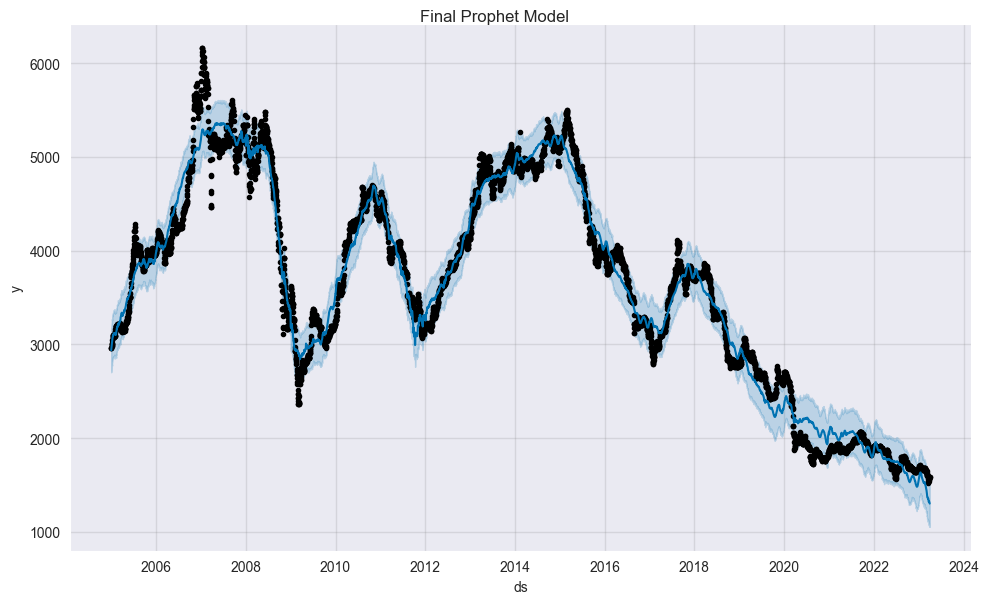

In [142]:
#Fitting the data and making predictions
final_future_data = final_model.make_future_dataframe(periods=365)#forecast the data for Test  data
final_forecast_data = final_model.predict(final_df)
fig = final_model.plot(final_forecast_data)
fig.suptitle("Final Prophet Model",y=1);

In [143]:
# finding the coefficients of the prophet model
regressor_coef1 = regressor_coefficients(final_model)
regressor_coef1[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

,regressor,regressor_mode,coef
1,Exc Rate,additive,-363.931366
3,GDP,additive,-109.120511
2,Inflation Rate,additive,-15.178049
0,CBK Rates,additive,27.563380


According to this model, the coefficients give the following information:
- For an increase in exchange rate by 1 Ksh with the US dollar, the share price decreases by 363.9 Kshs
- For an increase in GDP by 1 million, the share price decreases by 109.1 Kshs
- For an increase in inflation rate by 1%, the share price decreases by 15.2 Kshs
- For an increase in CBK rate by 1%, the share price increases by 27.6 Kshs

In [ ]:
# saving the model as a pickle file
with open ("final_model.pkl","wb") as f:
    pickle.dump(final_model,f)

## 9. Conclusions

- Stock prices are mostly influenced by the inflation and CBK Rates.
- Market anomalies like the Monday effect also largely influence the price at whick stocks trade at during the week.
- The prophet model is a better forecaster as compared to the traditional forecasting models like ARIMA.
- With the Prophet Model, as the prediction period is increased, the accuracy of the predictions gets weaker. Therefore, it is feasible for a short period of time. 

## 10. Recommendations

 - The company/developers could use additional data sources and incorporate more economic and financial indicators into the model. Additionally, developers could experiment with different machine learning algorithms, such as deep learning and reinforcement learning, to improve the accuracy of the predictions of the prophet model.
 
 - Continuously update and retrain the model: Stock market data is constantly changing, so it's important to regularly update and retrain the model to ensure it remains accurate and effective. As new data becomes available, incorporate it into the model and retrain it to improve its accuracy.
 
 - Companies should consider incorporating economic and financial indicators into their stock price prediction models, such as inflation and CBK rates, as this can help to improve the accuracy of the predictions. By taking into account factors such as inflation and CBK rates, companies can create more accurate models that can better forecast future stock prices.
 
 - Companies should use the prophet model for stock price predictions, as it is more accurate than traditional forecasting models like ARIMA. The prophet model is designed to account for trends, seasonality, and other market anomalies, making it more effective at predicting future stock prices.
 
 - Companies should account for market anomalies when making stock price predictions, such as the Monday effect, as these can have a significant influence on stock prices. By taking into account factors like the Monday effect, companies can ensure that their stock price predictions are as accurate as possible.
 
- Investors, traders, and financial analysts should leverage machine learning techniques to generate more accurate stock price predictions. By using advanced algorithms and large datasets, machine learning models can uncover patterns in the data that can be used to make more accurate predictions.

- Use the model as a tool, not a crystal ball: While the model is an effective tool for predicting stock prices, it's important to remember that it's not infallible. Encourage stakeholders to use the model as one of many tools in their investment decision-making process and to consider additional factors such as risk tolerance, diversification, and market trends.

## 11. Minimum Viable Product
- The prophet model with additional features was chosen as the minimum viable product.
- It is able to detect certain trends that lead to actionable recommendations, including the best time of the day or month to make buying or selling decisions.
- It is also able to incorporate additional predictors like macroeconomic indicators which could be helpful in predicting the share price.
- It has a short runtime.

#### Future Improvement Ideas
- Incorporating daily scraping of the current stock value so as to retrain the model and have better predictions.
- Having an interactive plot on the deployment webpage showcasing the historical share price as well as predictions for next day, week or month. 
- Having recommendations on the webpage on whether or not to buy and sell.